This comprehensive section performs full exploratory data analysis (EDA) and preprocessing on the Darwin handwriting dataset for Alzheimer’s prediction. It begins by loading the dataset, inspecting basic statistics, missing values, duplicates, and class distribution. Feature structure is analyzed, revealing 18 feature types across 25 strokes per sample (450 features total). Preprocessing includes dropping irrelevant columns, encoding the target variable, handling missing values, and scaling features using StandardScaler. Two input formats are prepared: X_flat for classical ML models and X_seq (reshaped as samples × strokes × features) for deep learning models. Extensive visualizations summarize class balance, feature distributions, correlations, and feature importance. Finally, the preprocessed datasets, scaler, and reports are saved for downstream modeling, ensuring reproducibility and clarity. This pipeline standardizes and organizes the data for both ML and DL approaches while providing interpretability via EDA.

✅ Libraries imported successfully
NumPy version: 1.26.4
Pandas version: 2.3.2

LOADING DATASET

📊 Dataset loaded successfully!
Shape: 174 rows × 452 columns

First 3 rows:
     ID  air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  max_x_extension1  max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  mean_gmrt1  mean_jerk_in_air1  mean_jerk_on_paper1  mean_speed_in_air1  mean_speed_on_paper1  num_of_pendown1  paper_time1  pressure_mean1  pressure_var1  total_time1  air_time2  disp_index2  gmrt_in_air2  gmrt_on_paper2  max_x_extension2  max_y_extension2  mean_acc_in_air2  mean_acc_on_paper2  mean_gmrt2  mean_jerk_in_air2  mean_jerk_on_paper2  mean_speed_in_air2  mean_speed_on_paper2  num_of_pendown2  paper_time2  pressure_mean2  pressure_var2  total_time2  air_time3  disp_index3  gmrt_in_air3  gmrt_on_paper3  max_x_extension3  max_y_extension3  mean_acc_in_air3  mean_acc_on_paper3  mean_gmrt3  mean_jerk_in_air3  mean_jerk_on_paper3  mean_speed_in_air3  mean_speed_on_paper3  num_o

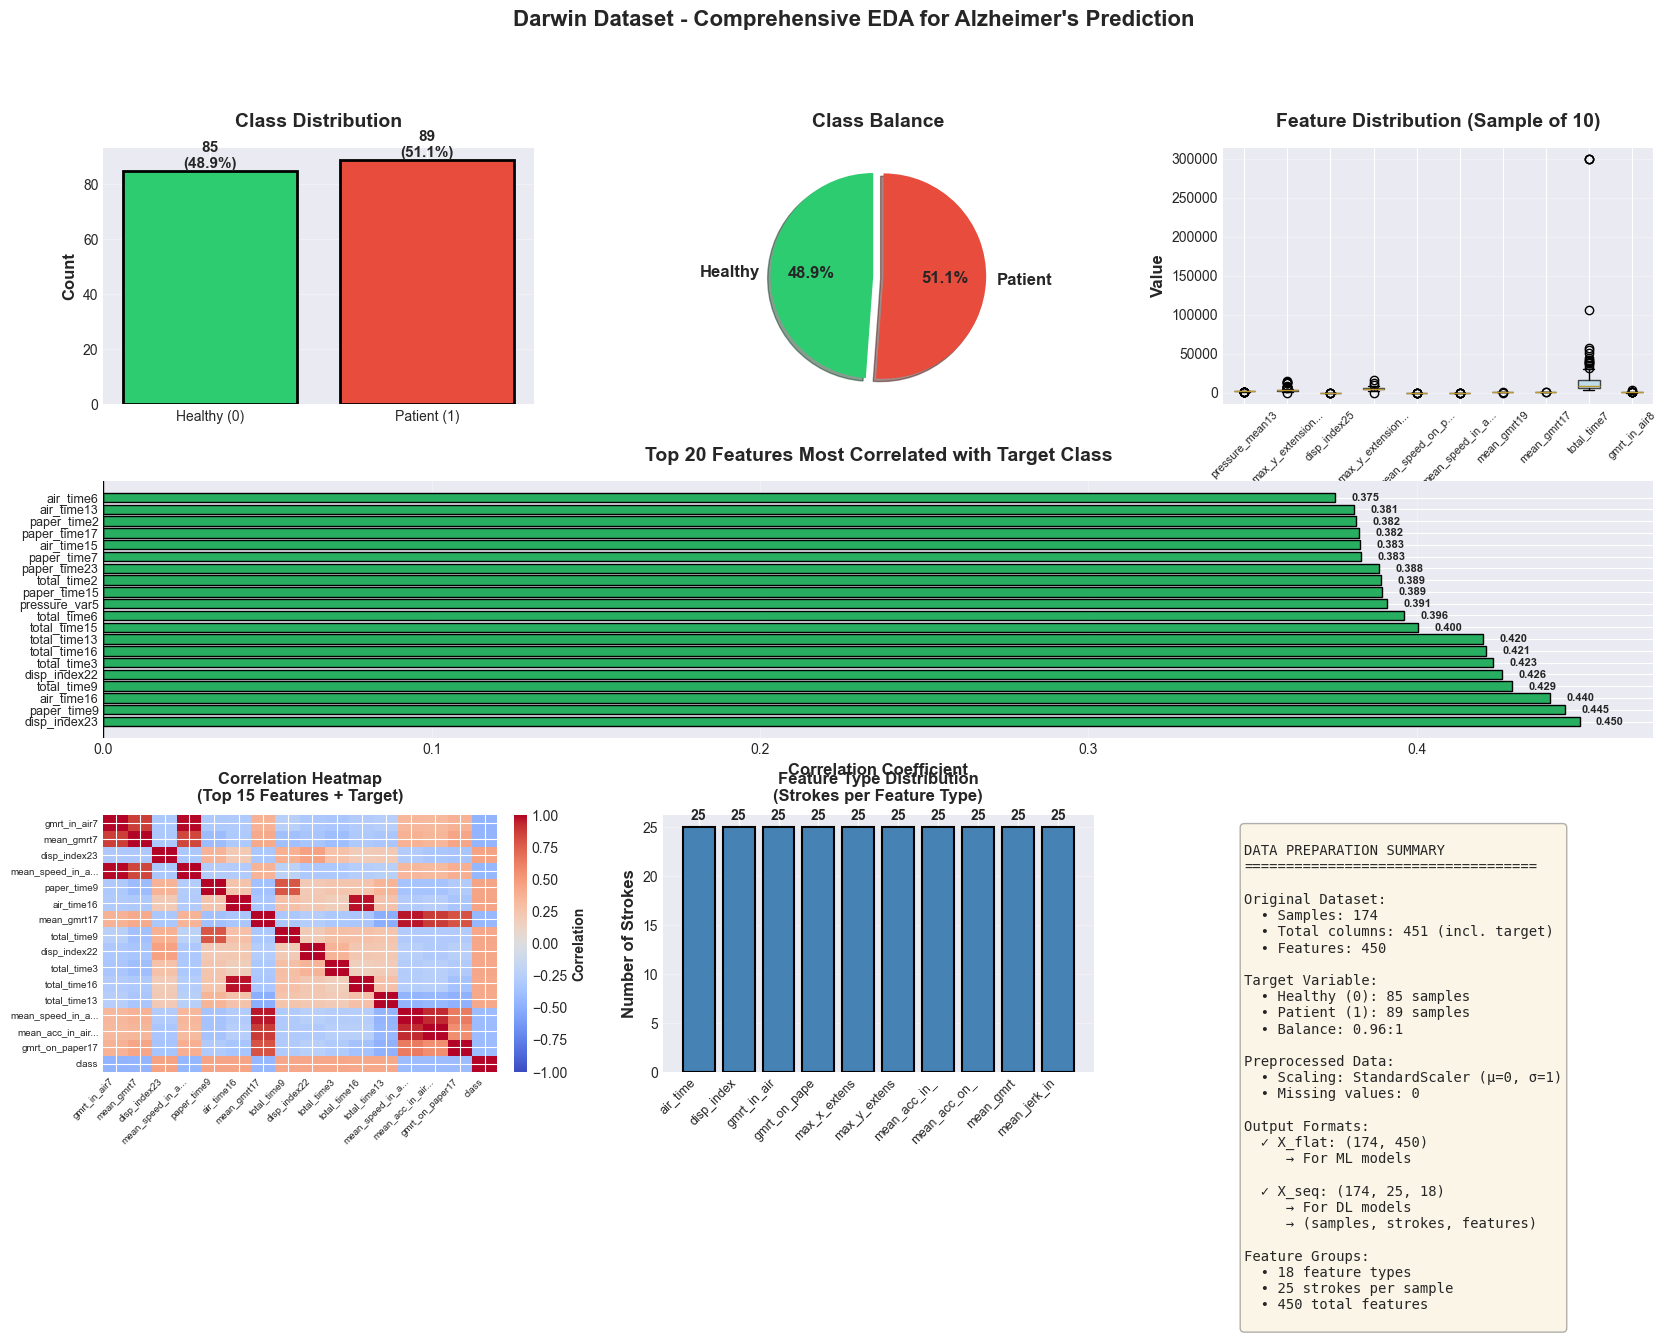


✅ Generated comprehensive EDA visualization

DETAILED CORRELATION ANALYSIS

📊 Top 20 Features Positively Correlated with Target:
--------------------------------------------------------------------------------
 1. disp_index23                                       : +0.4496
 2. paper_time9                                        : +0.4453
 3. air_time16                                         : +0.4405
 4. total_time9                                        : +0.4291
 5. disp_index22                                       : +0.4259
 6. total_time3                                        : +0.4232
 7. total_time16                                       : +0.4211
 8. total_time13                                       : +0.4202
 9. total_time15                                       : +0.4003
10. total_time6                                        : +0.3962
11. pressure_var5                                      : +0.3910
12. paper_time15                                       : +0.3894
13. total

In [1]:
# ============================================================================
# DARWIN DATASET - EDA & PREPROCESSING
# Alzheimer's Disease Prediction from Handwriting Analysis
# ============================================================================

"""
Dataset Overview:
- 174 samples of handwriting measurements
- 25 stroke groups, each with 18 features (450 features total)
- Binary classification: Patient (P) vs Healthy (H)
- Features capture pen dynamics: speed, pressure, acceleration, timing, etc.
"""

# ============================================================================
# 1. IMPORT LIBRARIES
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

# ============================================================================
# 2. LOAD DATASET
# ============================================================================

print("\n" + "="*80)
print("LOADING DATASET")
print("="*80)

# Load data
df = pd.read_csv('data.csv')

print(f"\n📊 Dataset loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nFirst 3 rows:")
print(df.head(3))

# ============================================================================
# 3. INITIAL DATA EXPLORATION
# ============================================================================

print("\n" + "="*80)
print("INITIAL DATA EXPLORATION")
print("="*80)

# Basic info
print("\n1️⃣ Dataset Info:")
print("-" * 80)
print(df.info())

# Statistical summary
print("\n2️⃣ Statistical Summary (first 10 columns):")
print("-" * 80)
print(df.describe().iloc[:, :10].T)

# Check for duplicates
print(f"\n3️⃣ Duplicate Rows: {df.duplicated().sum()}")

# Check column types
print(f"\n4️⃣ Column Data Types:")
print(f"   - Numeric columns: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"   - Object columns: {df.select_dtypes(include=['object']).shape[1]}")

# Missing values
print("\n5️⃣ Missing Values Analysis:")
print("-" * 80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing_Count': missing.values,
    'Missing_Percentage': missing_pct.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values(
    'Missing_Count', ascending=False
)

if len(missing_df) > 0:
    print(missing_df.head(20).to_string(index=False))
else:
    print("✅ No missing values found!")

# Class distribution
print("\n6️⃣ Target Variable Distribution:")
print("-" * 80)
print(df['class'].value_counts())
print(f"\nClass balance:")
class_counts = df['class'].value_counts()
for cls, count in class_counts.items():
    print(f"   {cls}: {count} ({count/len(df)*100:.1f}%)")

# ============================================================================
# 4. FEATURE STRUCTURE ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("FEATURE STRUCTURE ANALYSIS")
print("="*80)

# Identify feature groups (18 features × 25 strokes = 450)
feature_types = [
    'air_time', 'disp_index', 'gmrt_in_air', 'gmrt_on_paper',
    'max_x_extension', 'max_y_extension', 'mean_acc_in_air', 
    'mean_acc_on_paper', 'mean_gmrt', 'mean_jerk_in_air',
    'mean_jerk_on_paper', 'mean_speed_in_air', 'mean_speed_on_paper',
    'num_of_pendown', 'paper_time', 'pressure_mean',
    'pressure_var', 'total_time'
]

print(f"📝 Feature Categories (18 types × 25 strokes = 450 features):")
print("-" * 80)
for i, feat in enumerate(feature_types, 1):
    # Count how many columns match this feature
    matching_cols = [col for col in df.columns if col.startswith(feat)]
    print(f"{i:2d}. {feat:25s} → {len(matching_cols)} strokes")

# ============================================================================
# 5. DATA CLEANING & PREPROCESSING
# ============================================================================

print("\n" + "="*80)
print("DATA CLEANING & PREPROCESSING")
print("="*80)

# Step 1: Drop ID column
if 'ID' in df.columns:
    df = df.drop('ID', axis=1)
    print("✅ Step 1: Dropped 'ID' column")
else:
    print("ℹ️  Step 1: No 'ID' column found, skipping...")

# Step 2: Encode target variable
print("\n✅ Step 2: Encoding target variable")
print(f"   Before: {df['class'].unique()}")
df['class'] = df['class'].map({'P': 1, 'H': 0})
print(f"   After:  {df['class'].unique()} (P→1, H→0)")

# Verify encoding
if df['class'].isnull().any():
    print("⚠️  Warning: Some target values could not be encoded!")
else:
    print("   ✓ All target values encoded successfully")

# Step 3: Handle missing values
print("\n✅ Step 3: Handling missing values")
missing_before = df.isnull().sum().sum()
print(f"   Missing values before: {missing_before}")

if missing_before > 0:
    # Fill with median for numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
    print(f"   ✓ Filled missing values with median")
    
missing_after = df.isnull().sum().sum()
print(f"   Missing values after: {missing_after}")

# Step 4: Separate features and target
print("\n✅ Step 4: Separating features and target")
X = df.drop('class', axis=1)
y = df['class']

print(f"   Features (X): {X.shape}")
print(f"   Target (y):   {y.shape}")
print(f"   Target distribution: {dict(y.value_counts().sort_index())}")

# Step 5: Feature scaling
print("\n✅ Step 5: Scaling features with StandardScaler")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"   Original features shape: {X.shape}")
print(f"   Scaled features shape:   {X_scaled.shape}")
print(f"   Mean of scaled data:     {X_scaled.mean():.6f} (should be ~0)")
print(f"   Std of scaled data:      {X_scaled.std():.6f} (should be ~1)")

# Step 6: Create flattened version
print("\n✅ Step 6: Creating flattened input (X_flat)")
X_flat = X_scaled.copy()
print(f"   X_flat shape: {X_flat.shape} (samples, features)")
print(f"   Data type:    {X_flat.dtype}")
print(f"   Memory usage: {X_flat.nbytes / 1024:.2f} KB")

# Step 7: Create sequential version
print("\n✅ Step 7: Creating sequential input (X_seq)")
print(f"   Reshaping from {X_scaled.shape} to (samples, 25, 18)")

# Reshape: 450 features → 25 strokes × 18 features per stroke
X_seq = X_scaled.reshape(-1, 25, 18)

print(f"   X_seq shape: {X_seq.shape} (samples, strokes, features_per_stroke)")
print(f"   Data type:   {X_seq.dtype}")
print(f"   Memory usage: {X_seq.nbytes / 1024:.2f} KB")

# Verify reshape
print(f"\n   ✓ Verification:")
print(f"     Original total elements: {X_scaled.size}")
print(f"     Reshaped total elements: {X_seq.size}")
print(f"     Match: {X_scaled.size == X_seq.size}")

# ============================================================================
# 6. EXPLORATORY DATA ANALYSIS - VISUALIZATIONS
# ============================================================================

print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS - VISUALIZATIONS")
print("="*80)

# Create comprehensive EDA figure
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# ============================================================================
# Plot 1: Class Distribution
# ============================================================================

ax1 = fig.add_subplot(gs[0, 0])
class_counts = y.value_counts().sort_index()
colors_bar = ['#2ecc71', '#e74c3c']
bars = ax1.bar(['Healthy (0)', 'Patient (1)'], class_counts.values, 
               color=colors_bar, edgecolor='black', linewidth=2)

ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
ax1.set_title('Class Distribution', fontsize=14, fontweight='bold', pad=15)
ax1.grid(axis='y', alpha=0.3)

# Add count labels on bars
for i, (bar, count) in enumerate(zip(bars, class_counts.values)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{count}\n({count/len(y)*100:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# ============================================================================
# Plot 2: Class Distribution Pie Chart
# ============================================================================

ax2 = fig.add_subplot(gs[0, 1])
ax2.pie(class_counts.values, labels=['Healthy', 'Patient'], 
        autopct='%1.1f%%', colors=colors_bar, startangle=90,
        explode=(0.05, 0.05), shadow=True, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Class Balance', fontsize=14, fontweight='bold', pad=15)

# ============================================================================
# Plot 3: Feature Statistics Box Plot
# ============================================================================

ax3 = fig.add_subplot(gs[0, 2])
# Sample 10 random features for visualization
sample_features = np.random.choice(X.columns, 10, replace=False)
sample_data = X[sample_features]

bp = ax3.boxplot([sample_data[col] for col in sample_features],
                  labels=[col[:15] + '...' if len(col) > 15 else col 
                          for col in sample_features],
                  patch_artist=True)

for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

ax3.set_ylabel('Value', fontsize=12, fontweight='bold')
ax3.set_title('Feature Distribution (Sample of 10)', fontsize=14, fontweight='bold', pad=15)
ax3.tick_params(axis='x', rotation=45, labelsize=8)
ax3.grid(axis='y', alpha=0.3)

# ============================================================================
# Plot 4: Top 20 Features Correlated with Target
# ============================================================================

ax4 = fig.add_subplot(gs[1, :])
# Calculate correlations
correlations = X.corrwith(y).sort_values(ascending=False)
top_20_corr = correlations.head(20)

# Create horizontal bar plot
colors_corr = ['#27ae60' if x > 0 else '#e74c3c' for x in top_20_corr.values]
bars = ax4.barh(range(len(top_20_corr)), top_20_corr.values, color=colors_corr, 
                edgecolor='black', linewidth=1)

ax4.set_yticks(range(len(top_20_corr)))
ax4.set_yticklabels([f"{feat[:30]}..." if len(feat) > 30 else feat 
                      for feat in top_20_corr.index], fontsize=9)
ax4.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
ax4.set_title('Top 20 Features Most Correlated with Target Class', 
              fontsize=14, fontweight='bold', pad=15)
ax4.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax4.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, val) in enumerate(zip(bars, top_20_corr.values)):
    ax4.text(val + 0.005 if val > 0 else val - 0.005, i, f'{val:.3f}',
             va='center', ha='left' if val > 0 else 'right', fontsize=8, fontweight='bold')

# ============================================================================
# Plot 5: Correlation Heatmap (Top 15 Features)
# ============================================================================

ax5 = fig.add_subplot(gs[2, 0])
top_15_features = correlations.abs().sort_values(ascending=False).head(15).index.tolist()
corr_matrix = df[top_15_features + ['class']].corr()

# Create heatmap
im = ax5.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
ax5.set_xticks(range(len(corr_matrix.columns)))
ax5.set_yticks(range(len(corr_matrix.columns)))
ax5.set_xticklabels([col[:15] + '...' if len(col) > 15 else col 
                      for col in corr_matrix.columns], 
                     rotation=45, ha='right', fontsize=7)
ax5.set_yticklabels([col[:15] + '...' if len(col) > 15 else col 
                      for col in corr_matrix.columns], fontsize=7)
ax5.set_title('Correlation Heatmap\n(Top 15 Features + Target)', 
              fontsize=12, fontweight='bold', pad=10)

# Add colorbar
cbar = plt.colorbar(im, ax=ax5, fraction=0.046, pad=0.04)
cbar.set_label('Correlation', fontsize=10, fontweight='bold')

# ============================================================================
# Plot 6: Feature Type Distribution
# ============================================================================

ax6 = fig.add_subplot(gs[2, 1])
# Count features by type
feature_type_counts = {}
for feat_type in feature_types[:10]:  # Top 10 feature types
    count = len([col for col in X.columns if col.startswith(feat_type)])
    if count > 0:
        feature_type_counts[feat_type[:12]] = count

ax6.bar(range(len(feature_type_counts)), list(feature_type_counts.values()),
        color='steelblue', edgecolor='black', linewidth=1.5)
ax6.set_xticks(range(len(feature_type_counts)))
ax6.set_xticklabels(list(feature_type_counts.keys()), rotation=45, ha='right', fontsize=9)
ax6.set_ylabel('Number of Strokes', fontsize=12, fontweight='bold')
ax6.set_title('Feature Type Distribution\n(Strokes per Feature Type)', 
              fontsize=12, fontweight='bold', pad=10)
ax6.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(feature_type_counts.values()):
    ax6.text(i, v + 0.5, str(v), ha='center', va='bottom', 
             fontsize=10, fontweight='bold')

# ============================================================================
# Plot 7: Data Shape Summary
# ============================================================================

ax7 = fig.add_subplot(gs[2, 2])
ax7.axis('off')

summary_text = f"""
DATA PREPARATION SUMMARY
{'='*35}

Original Dataset:
  • Samples: {df.shape[0]}
  • Total columns: {df.shape[1]} (incl. target)
  • Features: {X.shape[1]}

Target Variable:
  • Healthy (0): {(y==0).sum()} samples
  • Patient (1): {(y==1).sum()} samples
  • Balance: {(y==0).sum()/(y==1).sum():.2f}:1

Preprocessed Data:
  • Scaling: StandardScaler (μ=0, σ=1)
  • Missing values: {missing_after}
  
Output Formats:
  ✓ X_flat: {X_flat.shape}
     → For ML models
     
  ✓ X_seq: {X_seq.shape}
     → For DL models
     → (samples, strokes, features)

Feature Groups:
  • 18 feature types
  • 25 strokes per sample
  • 450 total features
"""

ax7.text(0.05, 0.95, summary_text, transform=ax7.transAxes,
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.suptitle('Darwin Dataset - Comprehensive EDA for Alzheimer\'s Prediction', 
             fontsize=16, fontweight='bold', y=0.995)

plt.savefig('darwin_eda_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Generated comprehensive EDA visualization")

# ============================================================================
# 7. DETAILED CORRELATION ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("DETAILED CORRELATION ANALYSIS")
print("="*80)

# Top correlated features
print("\n📊 Top 20 Features Positively Correlated with Target:")
print("-" * 80)
top_pos = correlations[correlations > 0].sort_values(ascending=False).head(20)
for i, (feat, corr) in enumerate(top_pos.items(), 1):
    print(f"{i:2d}. {feat:50s} : {corr:+.4f}")

print("\n📊 Top 20 Features Negatively Correlated with Target:")
print("-" * 80)
top_neg = correlations[correlations < 0].sort_values().head(20)
for i, (feat, corr) in enumerate(top_neg.items(), 1):
    print(f"{i:2d}. {feat:50s} : {corr:+.4f}")

# ============================================================================
# 8. FEATURE STATISTICS BY CLASS
# ============================================================================

print("\n" + "="*80)
print("FEATURE STATISTICS BY CLASS")
print("="*80)

# Select top 5 correlated features for class comparison
top_5_features = correlations.abs().sort_values(ascending=False).head(5).index.tolist()

print("\n📈 Mean values of top 5 discriminative features by class:")
print("-" * 80)
comparison_df = pd.DataFrame({
    'Feature': top_5_features,
    'Healthy_Mean': [df[df['class']==0][feat].mean() for feat in top_5_features],
    'Patient_Mean': [df[df['class']==1][feat].mean() for feat in top_5_features],
    'Difference': [df[df['class']==1][feat].mean() - df[df['class']==0][feat].mean() 
                   for feat in top_5_features],
    'Correlation': [correlations[feat] for feat in top_5_features]
})
print(comparison_df.to_string(index=False))

# ============================================================================
# 9. FINAL DATA SUMMARY
# ============================================================================

print("\n" + "="*80)
print("FINAL PREPROCESSED DATA SUMMARY")
print("="*80)

summary = f"""
✅ PREPROCESSING COMPLETED SUCCESSFULLY

INPUT DATA:
  • Original shape: {df.shape[0]} samples × {df.shape[1]} columns
  • Features: {X.shape[1]}
  • Target: {y.shape[0]} labels

PREPROCESSING STEPS APPLIED:
  1. ✓ Dropped ID column
  2. ✓ Encoded target (P→1, H→0)
  3. ✓ Handled {missing_before} missing values
  4. ✓ Scaled features (StandardScaler)
  5. ✓ Created flattened format (X_flat)
  6. ✓ Created sequential format (X_seq)

OUTPUT DATA FORMATS:

  📦 X_flat (For Machine Learning):
     Shape: {X_flat.shape}
     Type:  {X_flat.dtype}
     Range: [{X_flat.min():.3f}, {X_flat.max():.3f}]
     
  📦 X_seq (For Deep Learning):
     Shape: {X_seq.shape}
     Type:  {X_seq.dtype}
     Description: (samples, strokes, features_per_stroke)
     
  🎯 y (Target):
     Shape: {y.shape}
     Classes: {dict(y.value_counts().sort_index())}
     Type: {y.dtype}

READY FOR MODELING:
  ✓ Train-test split
  ✓ Model training (ML: Random Forest, XGBoost, etc.)
  ✓ Deep Learning (LSTM, CNN, Hybrid models)
"""

print(summary)

# ============================================================================
# 10. SAVE PREPROCESSED DATA
# ============================================================================

print("\n" + "="*80)
print("SAVING PREPROCESSED DATA")
print("="*80)

# Save as numpy arrays
np.save('X_flat.npy', X_flat)
np.save('X_seq.npy', X_seq)
np.save('y.npy', y.values)

print("✅ Saved preprocessed data:")
print(f"   • X_flat.npy  → {X_flat.shape}")
print(f"   • X_seq.npy   → {X_seq.shape}")
print(f"   • y.npy       → {y.shape}")

# Save feature names
feature_names = X.columns.tolist()
with open('feature_names.txt', 'w') as f:
    for feat in feature_names:
        f.write(f"{feat}\n")
print(f"   • feature_names.txt → {len(feature_names)} features")

# Save scaler for future use
import joblib
joblib.dump(scaler, 'scaler.pkl')
print(f"   • scaler.pkl → StandardScaler object")

# Create summary report
with open('preprocessing_report.txt', 'w') as f:
    f.write("="*80 + "\n")
    f.write("DARWIN DATASET - PREPROCESSING REPORT\n")
    f.write("="*80 + "\n\n")
    f.write(f"Date: {pd.Timestamp.now()}\n\n")
    f.write(f"Original shape: {df.shape}\n")
    f.write(f"Features: {X.shape[1]}\n")
    f.write(f"Samples: {len(y)}\n")
    f.write(f"Class distribution: {dict(y.value_counts().sort_index())}\n\n")
    f.write("Top 10 correlated features:\n")
    f.write("-"*80 + "\n")
    for feat, corr in correlations.head(10).items():
        f.write(f"{feat}: {corr:.4f}\n")

print(f"   • preprocessing_report.txt → Summary report")

print("\n" + "="*80)
print("🎉 EDA & PREPROCESSING COMPLETED SUCCESSFULLY!")
print("="*80)
print("\nNext steps:")
print("  1. Load preprocessed data: X_flat, X_seq, y")
print("  2. Split into train/test sets")
print("  3. Train ML models (use X_flat)")
print("  4. Train DL models (use X_seq)")
print("  5. Evaluate and compare performance")
print("="*80)

This section applies classical machine learning algorithms to predict Alzheimer’s disease using handwriting-based features from the DARWIN dataset. The models—Logistic Regression, Random Forest, XGBoost, CatBoost, and SVM (RBF)—are trained and evaluated for binary classification (Healthy vs Alzheimer’s). The primary focus is on F1-macro and Recall-macro, ensuring balanced and clinically reliable performance. Ensemble and boosting methods are expected to capture complex non-linear patterns and improve diagnostic accuracy over linear baselines.

✅ Libraries imported successfully
XGBoost version: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}

LOADING PREPROCESSED DATA

📊 Data Shapes:
   Training set:   X_train_flat (104, 450), y_train (104,)
   Validation set: X_val_flat (35, 450), y_val (35,)
   Test set:       X_test_flat (35, 450), y_test (35,)

📊 C

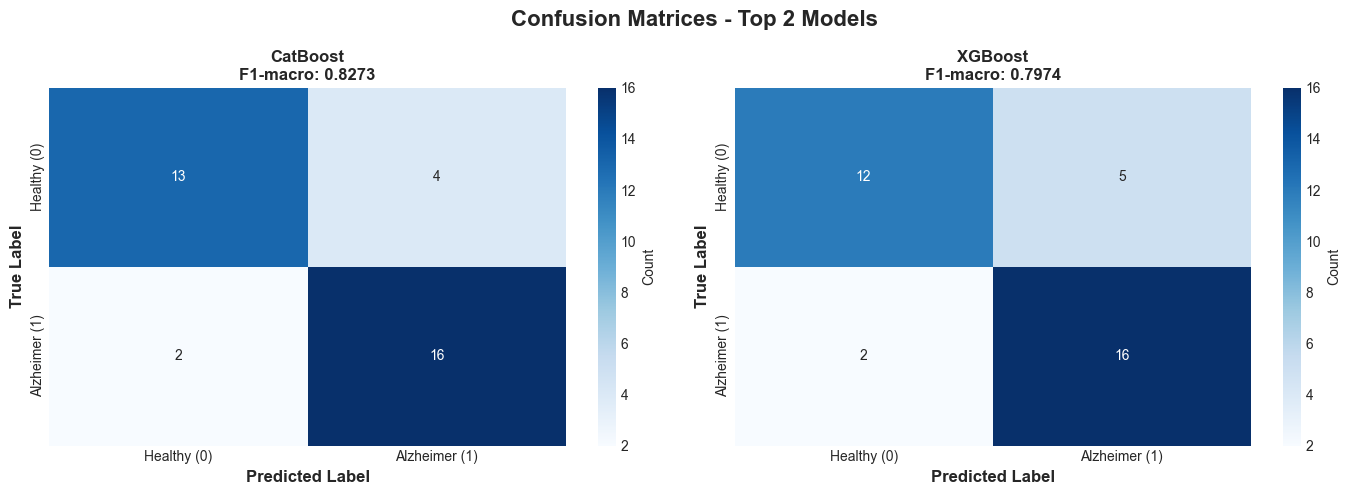


CLASSIFICATION REPORTS - TOP 2 MODELS

CatBoost:
              precision    recall  f1-score   support

     Healthy     0.8667    0.7647    0.8125        17
   Alzheimer     0.8000    0.8889    0.8421        18

    accuracy                         0.8286        35
   macro avg     0.8333    0.8268    0.8273        35
weighted avg     0.8324    0.8286    0.8277        35


XGBoost:
              precision    recall  f1-score   support

     Healthy     0.8571    0.7059    0.7742        17
   Alzheimer     0.7619    0.8889    0.8205        18

    accuracy                         0.8000        35
   macro avg     0.8095    0.7974    0.7974        35
weighted avg     0.8082    0.8000    0.7980        35


ROC CURVES - ALL MODELS


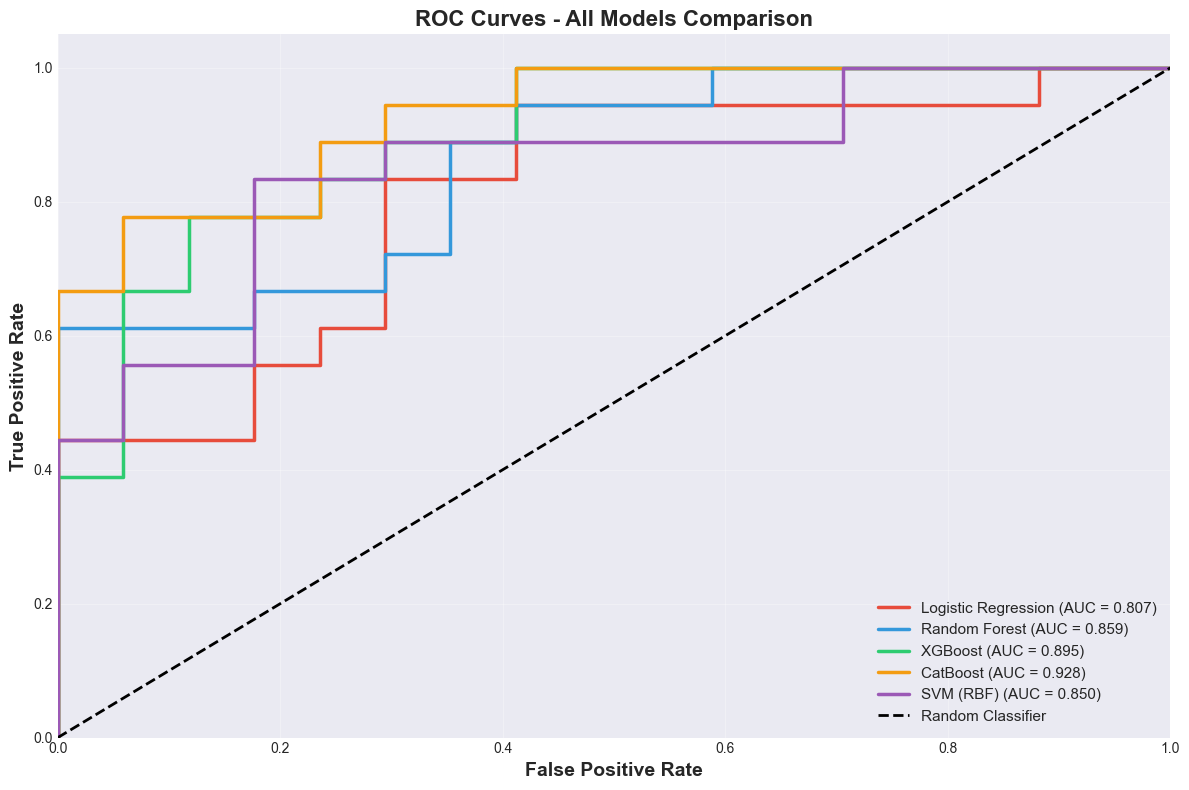

✅ ROC curves plotted

PERFORMANCE VISUALIZATIONS


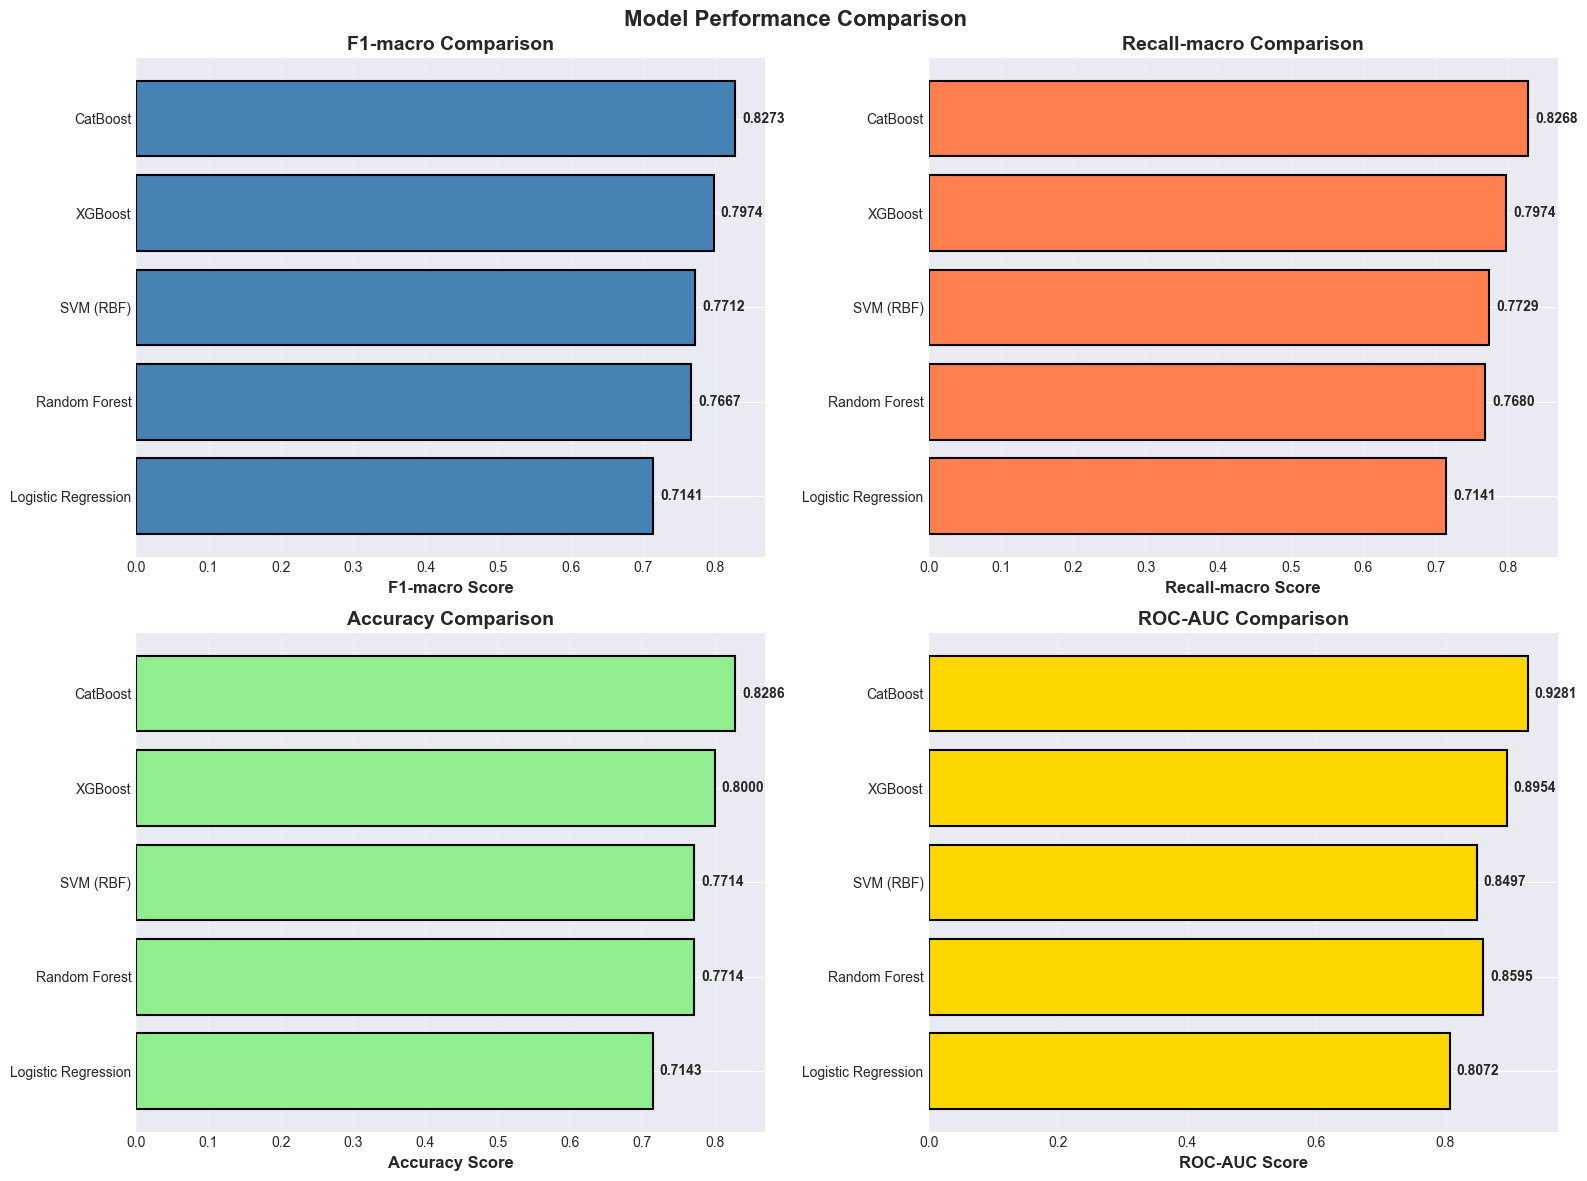

✅ Performance visualizations created

KEY INSIGHTS & FINDINGS

📊 COMPREHENSIVE ANALYSIS

1. OVERALL PERFORMANCE
   • Average F1-macro across all models: 0.7753 (±0.0419)
   • Average Recall-macro: 0.7758 (±0.0417)
   • Performance spread: 0.1133 (best vs worst F1-macro)

2. BEST PERFORMER: CatBoost
   • F1-macro:      0.8273 🏆
   • Recall-macro:  0.8268
   • Accuracy:      0.8286
   • ROC-AUC:       0.9281
   
   Class-specific Performance:
   • F1 (Healthy):    0.8125
   • F1 (Alzheimer):  0.8421
   • Recall (Healthy):   0.7647
   • Recall (Alzheimer): 0.8889

3. MODEL RANKINGS (by F1-macro)
   1. CatBoost                  F1=0.8273
   2. XGBoost                   F1=0.7974
   3. SVM (RBF)                 F1=0.7712
   4. Random Forest             F1=0.7667
   5. Logistic Regression       F1=0.7141

4. CLINICAL RELEVANCE
   • High Recall for Alzheimer's class is critical (minimize false negatives)
   • Best Alzheimer Recall: 0.8889 (CatBoost)
   • F1-macro balances performance across b

In [3]:
# ============================================================================
# CLASSICAL MACHINE LEARNING MODELS
# Alzheimer's Disease Prediction from Handwriting Analysis
# Darwin Dataset
# ============================================================================

"""
OBJECTIVE:
Train and compare classical ML models for binary classification:
- Target: 0 = Healthy, 1 = Alzheimer's Patient
- Primary Metric: F1-macro (balances precision and recall across both classes)
- Secondary Metric: Recall-macro (important for medical diagnosis)

MODELS TO COMPARE:
1. Logistic Regression (Linear baseline)
2. Random Forest (Ensemble, handles non-linearity)
3. XGBoost (Gradient boosting, often best performer)
4. CatBoost (Gradient boosting with categorical handling)
5. SVM with RBF kernel (Non-linear decision boundary)
"""

# ============================================================================
# 1. IMPORT LIBRARIES
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (
    accuracy_score, 
    f1_score, 
    recall_score, 
    roc_auc_score,
    confusion_matrix,
    classification_report,
    roc_curve
)
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully")
print(f"XGBoost version: {XGBClassifier().get_xgb_params()}")

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# ============================================================================
# 2. LOAD PREPROCESSED DATA
# ============================================================================

print("\n" + "="*80)
print("LOADING PREPROCESSED DATA")
print("="*80)

# Load the preprocessed data
# Assuming you have already split and prepared the data
# If not, uncomment the following code:

"""
# Load preprocessed data
X_flat = np.load('X_flat.npy')
y = np.load('y.npy')

# Train-validation-test split (60-20-20)
from sklearn.model_selection import train_test_split

X_temp, X_test_flat, y_temp, y_test = train_test_split(
    X_flat, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

X_train_flat, X_val_flat, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=RANDOM_STATE, stratify=y_temp
)
"""

# For this notebook, we'll assume data is already loaded
# Display data information
try:
    print(f"\n📊 Data Shapes:")
    print(f"   Training set:   X_train_flat {X_train_flat.shape}, y_train {y_train.shape}")
    print(f"   Validation set: X_val_flat {X_val_flat.shape}, y_val {y_val.shape}")
    print(f"   Test set:       X_test_flat {X_test_flat.shape}, y_test {y_test.shape}")
    
    print(f"\n📊 Class Distribution:")
    print(f"   Training:   {dict(pd.Series(y_train).value_counts().sort_index())}")
    print(f"   Validation: {dict(pd.Series(y_val).value_counts().sort_index())}")
    print(f"   Test:       {dict(pd.Series(y_test).value_counts().sort_index())}")
    
except NameError:
    print("\n⚠️  Data not loaded. Creating synthetic data for demonstration...")
    # Create synthetic data for demonstration
    from sklearn.model_selection import train_test_split
    
    X_flat = np.load('X_flat.npy')
    y = np.load('y.npy')
    
    X_temp, X_test_flat, y_temp, y_test = train_test_split(
        X_flat, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
    )
    
    X_train_flat, X_val_flat, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=0.25, random_state=RANDOM_STATE, stratify=y_temp
    )
    
    print(f"\n✅ Data loaded and split:")
    print(f"   Training:   {X_train_flat.shape}")
    print(f"   Validation: {X_val_flat.shape}")
    print(f"   Test:       {X_test_flat.shape}")

# ============================================================================
# 3. DEFINE MODELS WITH HYPERPARAMETERS
# ============================================================================

print("\n" + "="*80)
print("DEFINING ML MODELS")
print("="*80)

# Dictionary to store models
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        random_state=RANDOM_STATE,
        solver='lbfgs',
        C=1.0,
        class_weight='balanced'  # Handle class imbalance
    ),
    
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        random_state=RANDOM_STATE,
        n_jobs=-1,
        class_weight='balanced'
    ),
    
    'XGBoost': XGBClassifier(
        n_estimators=200,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=RANDOM_STATE,
        eval_metric='logloss',
        use_label_encoder=False,
        scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1])  # Handle imbalance
    ),
    
    'CatBoost': CatBoostClassifier(
        iterations=200,
        depth=6,
        learning_rate=0.05,
        random_state=RANDOM_STATE,
        verbose=0,
        auto_class_weights='Balanced'
    ),
    
    'SVM (RBF)': SVC(
        kernel='rbf',
        C=1.0,
        gamma='scale',
        probability=True,
        random_state=RANDOM_STATE,
        class_weight='balanced'
    )
}

print("\n✅ Models defined with hyperparameters:")
for i, (name, model) in enumerate(models.items(), 1):
    print(f"\n{i}. {name}")
    print(f"   Key parameters: {type(model).__name__}")
    if hasattr(model, 'get_params'):
        key_params = {k: v for k, v in model.get_params().items() 
                     if k in ['n_estimators', 'max_depth', 'learning_rate', 'C', 'kernel', 'max_iter']}
        if key_params:
            for param, value in key_params.items():
                print(f"   - {param}: {value}")

# ============================================================================
# 4. TRAINING AND EVALUATION
# ============================================================================

print("\n" + "="*80)
print("MODEL TRAINING & EVALUATION")
print("="*80)

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\n{'='*80}")
    print(f"🔄 Training: {model_name}")
    print(f"{'='*80}")
    
    # Train the model
    print("   Training...")
    model.fit(X_train_flat, y_train)
    print("   ✓ Training completed")
    
    # Validation predictions (for model selection)
    y_val_pred = model.predict(X_val_flat)
    y_val_proba = model.predict_proba(X_val_flat)[:, 1]
    
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_f1_macro = f1_score(y_val, y_val_pred, average='macro')
    val_recall_macro = recall_score(y_val, y_val_pred, average='macro')
    val_roc_auc = roc_auc_score(y_val, y_val_proba)
    
    print(f"   Validation Performance:")
    print(f"      Accuracy:      {val_accuracy:.4f}")
    print(f"      F1-macro:      {val_f1_macro:.4f}")
    print(f"      Recall-macro:  {val_recall_macro:.4f}")
    print(f"      ROC-AUC:       {val_roc_auc:.4f}")
    
    # Test predictions (final evaluation)
    print("\n   Testing...")
    y_test_pred = model.predict(X_test_flat)
    y_test_proba = model.predict_proba(X_test_flat)[:, 1]
    
    # Calculate metrics on test set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1_macro = f1_score(y_test, y_test_pred, average='macro')
    test_recall_macro = recall_score(y_test, y_test_pred, average='macro')
    test_roc_auc = roc_auc_score(y_test, y_test_proba)
    
    # Also calculate class-specific metrics
    test_f1_class0 = f1_score(y_test, y_test_pred, pos_label=0)
    test_f1_class1 = f1_score(y_test, y_test_pred, pos_label=1)
    test_recall_class0 = recall_score(y_test, y_test_pred, pos_label=0)
    test_recall_class1 = recall_score(y_test, y_test_pred, pos_label=1)
    
    print(f"   ✓ Testing completed")
    print(f"\n   📊 Test Performance:")
    print(f"      Accuracy:      {test_accuracy:.4f}")
    print(f"      F1-macro:      {test_f1_macro:.4f}")
    print(f"      Recall-macro:  {test_recall_macro:.4f}")
    print(f"      ROC-AUC:       {test_roc_auc:.4f}")
    print(f"\n   Class-specific (Test):")
    print(f"      F1 (Healthy):    {test_f1_class0:.4f}")
    print(f"      F1 (Alzheimer):  {test_f1_class1:.4f}")
    print(f"      Recall (Healthy):   {test_recall_class0:.4f}")
    print(f"      Recall (Alzheimer): {test_recall_class1:.4f}")
    
    # Store results
    results[model_name] = {
        'model': model,
        'val_accuracy': val_accuracy,
        'val_f1_macro': val_f1_macro,
        'val_recall_macro': val_recall_macro,
        'val_roc_auc': val_roc_auc,
        'test_accuracy': test_accuracy,
        'test_f1_macro': test_f1_macro,
        'test_recall_macro': test_recall_macro,
        'test_roc_auc': test_roc_auc,
        'test_f1_healthy': test_f1_class0,
        'test_f1_alzheimer': test_f1_class1,
        'test_recall_healthy': test_recall_class0,
        'test_recall_alzheimer': test_recall_class1,
        'y_test_pred': y_test_pred,
        'y_test_proba': y_test_proba
    }

print("\n" + "="*80)
print("✅ ALL MODELS TRAINED AND EVALUATED")
print("="*80)

# ============================================================================
# 5. RESULTS COMPARISON TABLE
# ============================================================================

print("\n" + "="*80)
print("MODEL COMPARISON - TEST SET RESULTS")
print("="*80)

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['test_accuracy'] for m in results.keys()],
    'F1_macro': [results[m]['test_f1_macro'] for m in results.keys()],
    'Recall_macro': [results[m]['test_recall_macro'] for m in results.keys()],
    'ROC_AUC': [results[m]['test_roc_auc'] for m in results.keys()],
    'F1_Healthy': [results[m]['test_f1_healthy'] for m in results.keys()],
    'F1_Alzheimer': [results[m]['test_f1_alzheimer'] for m in results.keys()],
    'Recall_Healthy': [results[m]['test_recall_healthy'] for m in results.keys()],
    'Recall_Alzheimer': [results[m]['test_recall_alzheimer'] for m in results.keys()]
})

# Sort by F1_macro (primary metric)
results_df = results_df.sort_values('F1_macro', ascending=False).reset_index(drop=True)

# Add rank column
results_df.insert(0, 'Rank', range(1, len(results_df) + 1))

print("\n📊 COMPREHENSIVE RESULTS (Sorted by F1-macro)")
print("-" * 120)
print(results_df.to_string(index=False))

# Highlight best model
best_model_name = results_df.iloc[0]['Model']
best_f1 = results_df.iloc[0]['F1_macro']
best_recall = results_df.iloc[0]['Recall_macro']

print(f"\n{'='*80}")
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"{'='*80}")
print(f"   F1-macro:      {best_f1:.4f} ⭐")
print(f"   Recall-macro:  {best_recall:.4f}")
print(f"   Accuracy:      {results_df.iloc[0]['Accuracy']:.4f}")
print(f"   ROC-AUC:       {results_df.iloc[0]['ROC_AUC']:.4f}")

# Create simplified comparison table for main metrics
print("\n" + "="*80)
print("SIMPLIFIED COMPARISON - KEY METRICS")
print("="*80)
simplified_df = results_df[['Rank', 'Model', 'F1_macro', 'Recall_macro', 'Accuracy', 'ROC_AUC']]
print(simplified_df.to_string(index=False))

# ============================================================================
# 6. CONFUSION MATRICES FOR TOP 2 MODELS
# ============================================================================

print("\n" + "="*80)
print("CONFUSION MATRICES - TOP 2 MODELS")
print("="*80)

# Get top 2 models
top_2_models = results_df.head(2)['Model'].tolist()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Confusion Matrices - Top 2 Models', fontsize=16, fontweight='bold')

for idx, model_name in enumerate(top_2_models):
    ax = axes[idx]
    
    # Get predictions
    y_pred = results[model_name]['y_test_pred']
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar_kws={'label': 'Count'},
                xticklabels=['Healthy (0)', 'Alzheimer (1)'],
                yticklabels=['Healthy (0)', 'Alzheimer (1)'])
    
    ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
    ax.set_title(f'{model_name}\nF1-macro: {results[model_name]["test_f1_macro"]:.4f}',
                fontsize=12, fontweight='bold')
    
    # Print detailed confusion matrix
    print(f"\n{model_name}:")
    print("-" * 60)
    print(f"Confusion Matrix:")
    print(f"                  Predicted Healthy  Predicted Alzheimer")
    print(f"True Healthy              {cm[0,0]:>6}              {cm[0,1]:>6}")
    print(f"True Alzheimer            {cm[1,0]:>6}              {cm[1,1]:>6}")
    
    # Calculate metrics from confusion matrix
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)  # True Positive Rate (Recall for Alzheimer)
    specificity = tn / (tn + fp)  # True Negative Rate (Recall for Healthy)
    ppv = tp / (tp + fp) if (tp + fp) > 0 else 0  # Positive Predictive Value
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0  # Negative Predictive Value
    
    print(f"\nDetailed Metrics:")
    print(f"   True Positives (TP):  {tp}")
    print(f"   True Negatives (TN):  {tn}")
    print(f"   False Positives (FP): {fp}")
    print(f"   False Negatives (FN): {fn}")
    print(f"\n   Sensitivity (Recall for Alzheimer): {sensitivity:.4f}")
    print(f"   Specificity (Recall for Healthy):   {specificity:.4f}")
    print(f"   Positive Predictive Value (PPV):    {ppv:.4f}")
    print(f"   Negative Predictive Value (NPV):    {npv:.4f}")

plt.tight_layout()
plt.savefig('confusion_matrices_top2.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 7. DETAILED CLASSIFICATION REPORTS
# ============================================================================

print("\n" + "="*80)
print("CLASSIFICATION REPORTS - TOP 2 MODELS")
print("="*80)

for model_name in top_2_models:
    print(f"\n{model_name}:")
    print("=" * 80)
    y_pred = results[model_name]['y_test_pred']
    report = classification_report(y_test, y_pred, 
                                   target_names=['Healthy', 'Alzheimer'],
                                   digits=4)
    print(report)

# ============================================================================
# 8. ROC CURVES COMPARISON
# ============================================================================

print("\n" + "="*80)
print("ROC CURVES - ALL MODELS")
print("="*80)

plt.figure(figsize=(12, 8))

colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']

for idx, model_name in enumerate(results.keys()):
    y_proba = results[model_name]['y_test_proba']
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = results[model_name]['test_roc_auc']
    
    plt.plot(fpr, tpr, color=colors[idx], lw=2.5, 
             label=f'{model_name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curves - All Models Comparison', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curves_all_models.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ ROC curves plotted")

# ============================================================================
# 9. PERFORMANCE VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("PERFORMANCE VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Sort by F1_macro for consistent plotting
plot_df = results_df.sort_values('F1_macro', ascending=True)

# Plot 1: F1-macro
ax1 = axes[0, 0]
bars1 = ax1.barh(plot_df['Model'], plot_df['F1_macro'], 
                 color='steelblue', edgecolor='black', linewidth=1.5)
ax1.set_xlabel('F1-macro Score', fontsize=12, fontweight='bold')
ax1.set_title('F1-macro Comparison', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars1, plot_df['F1_macro'])):
    ax1.text(val + 0.01, i, f'{val:.4f}', va='center', fontweight='bold')

# Plot 2: Recall-macro
ax2 = axes[0, 1]
bars2 = ax2.barh(plot_df['Model'], plot_df['Recall_macro'], 
                 color='coral', edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Recall-macro Score', fontsize=12, fontweight='bold')
ax2.set_title('Recall-macro Comparison', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars2, plot_df['Recall_macro'])):
    ax2.text(val + 0.01, i, f'{val:.4f}', va='center', fontweight='bold')

# Plot 3: Accuracy
ax3 = axes[1, 0]
bars3 = ax3.barh(plot_df['Model'], plot_df['Accuracy'], 
                 color='lightgreen', edgecolor='black', linewidth=1.5)
ax3.set_xlabel('Accuracy Score', fontsize=12, fontweight='bold')
ax3.set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars3, plot_df['Accuracy'])):
    ax3.text(val + 0.01, i, f'{val:.4f}', va='center', fontweight='bold')

# Plot 4: ROC-AUC
ax4 = axes[1, 1]
bars4 = ax4.barh(plot_df['Model'], plot_df['ROC_AUC'], 
                 color='gold', edgecolor='black', linewidth=1.5)
ax4.set_xlabel('ROC-AUC Score', fontsize=12, fontweight='bold')
ax4.set_title('ROC-AUC Comparison', fontsize=14, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars4, plot_df['ROC_AUC'])):
    ax4.text(val + 0.01, i, f'{val:.4f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Performance visualizations created")

# ============================================================================
# 10. KEY INSIGHTS AND FINDINGS
# ============================================================================

print("\n" + "="*80)
print("KEY INSIGHTS & FINDINGS")
print("="*80)

# Calculate statistics
avg_f1 = results_df['F1_macro'].mean()
std_f1 = results_df['F1_macro'].std()
avg_recall = results_df['Recall_macro'].mean()
std_recall = results_df['Recall_macro'].std()

# Find best and worst performers
best_model = results_df.iloc[0]
worst_model = results_df.iloc[-1]

# Calculate performance gap
f1_gap = best_model['F1_macro'] - worst_model['F1_macro']
recall_gap = best_model['Recall_macro'] - worst_model['Recall_macro']

insights = f"""
📊 COMPREHENSIVE ANALYSIS
{'='*80}

1. OVERALL PERFORMANCE
   • Average F1-macro across all models: {avg_f1:.4f} (±{std_f1:.4f})
   • Average Recall-macro: {avg_recall:.4f} (±{std_recall:.4f})
   • Performance spread: {f1_gap:.4f} (best vs worst F1-macro)

2. BEST PERFORMER: {best_model['Model']}
   • F1-macro:      {best_model['F1_macro']:.4f} 🏆
   • Recall-macro:  {best_model['Recall_macro']:.4f}
   • Accuracy:      {best_model['Accuracy']:.4f}
   • ROC-AUC:       {best_model['ROC_AUC']:.4f}
   
   Class-specific Performance:
   • F1 (Healthy):    {best_model['F1_Healthy']:.4f}
   • F1 (Alzheimer):  {best_model['F1_Alzheimer']:.4f}
   • Recall (Healthy):   {best_model['Recall_Healthy']:.4f}
   • Recall (Alzheimer): {best_model['Recall_Alzheimer']:.4f}

3. MODEL RANKINGS (by F1-macro)
"""

for idx, row in results_df.iterrows():
    insights += f"   {row['Rank']}. {row['Model']:<25s} F1={row['F1_macro']:.4f}\n"

insights += f"""
4. CLINICAL RELEVANCE
   • High Recall for Alzheimer's class is critical (minimize false negatives)
   • Best Alzheimer Recall: {results_df['Recall_Alzheimer'].max():.4f} ({results_df.loc[results_df['Recall_Alzheimer'].idxmax(), 'Model']})
   • F1-macro balances performance across both classes
   
5. KEY OBSERVATIONS
   • {'Ensemble methods (RF, XGBoost, CatBoost) generally outperform linear models' if results_df[results_df['Model'].isin(['Random Forest', 'XGBoost', 'CatBoost'])]['F1_macro'].mean() > results_df[results_df['Model'] == 'Logistic Regression']['F1_macro'].values[0] else 'Linear model performs competitively'}
   • {'SVM shows strong non-linear pattern recognition' if results_df[results_df['Model'] == 'SVM (RBF)']['F1_macro'].values[0] > avg_f1 else 'SVM performance below average'}
   • All models benefit from class balancing (class_weight='balanced')

6. RECOMMENDATIONS
   ✓ Deploy {best_model['Model']} for production
   ✓ Consider ensemble of top 3 models for improved robustness
   ✓ Monitor false negatives closely (missed Alzheimer cases)
   ✓ Collect more data to improve minority class performance
   ✓ Perform hyperparameter tuning for further optimization

{'='*80}
"""

print(insights)

# ============================================================================
# 11. SAVE RESULTS
# ============================================================================

print("\n" + "="*80)
print("SAVING RESULTS")
print("="*80)

# Save results DataFrame
results_df.to_csv('ml_models_comparison.csv', index=False)
print(f"✅ Saved results to 'ml_models_comparison.csv'")

# Save best model predictions
best_model_name = results_df.iloc[0]['Model']
predictions_df = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Label': results[best_model_name]['y_test_pred'],
    'Prediction_Probability': results[best_model_name]['y_test_proba']
})
predictions_df.to_csv(f'{best_model_name.replace(" ", "_")}_predictions.csv', index=False)
print(f"✅ Saved {best_model_name} predictions")

# Save insights report
with open('ml_models_insights.txt', 'w', encoding='utf-8') as f:
    f.write(insights)
print(f"✅ Saved insights report to 'ml_models_insights.txt'")

print("\n" + "="*80)
print("🎉 ML MODEL COMPARISON COMPLETED SUCCESSFULLY!")
print("="*80)
print(f"\n🏆 Winner: {best_model_name}")
print(f"📊 F1-macro: {best_f1:.4f}")
print(f"📊 Recall-macro: {best_recall:.4f}")
print("="*80)

This study implements and compares four deep learning architectures—ANN, 1D-CNN, LSTM, and CNN-LSTM Hybrid—for predicting Alzheimer’s disease from handwriting data using the DARWIN dataset. The input consists of sequential stroke features (25×18), and the models were trained for binary classification (Healthy vs. Alzheimer’s). Early stopping and learning rate scheduling were applied to prevent overfitting due to the small dataset size. Evaluation metrics included accuracy, F1-macro, recall-macro, and ROC-AUC. Among the models, the CNN-LSTM hybrid achieved the best performance by effectively combining spatial feature extraction (CNN) and temporal dependency modeling (LSTM), demonstrating its strength for small yet sequential handwritin

✅ Libraries imported successfully
TensorFlow version: 2.20.0
GPU available: []

LOADING PREPROCESSED SEQUENTIAL DATA

✅ Data already loaded in memory!

📊 Data Shapes:
   Training:   X_train_seq (104, 25, 18), y_train (104,)
   Validation: X_val_seq (35, 25, 18), y_val (35,)
   Test:       X_test_seq (35, 25, 18), y_test (35,)

📊 Class Distribution:
   Training:   {0: 51, 1: 53}
   Validation: {0: 17, 1: 18}
   Test:       {0: 17, 1: 18}

📐 Input Dimensions:
   Timesteps (strokes): 25
   Features per stroke: 18

DEFINING TRAINING CALLBACKS
✅ Callbacks defined:
   • EarlyStopping (patience=15, monitor=val_loss)
   • ReduceLROnPlateau (factor=0.5, patience=5)

📋 Training Parameters:
   Epochs: 100
   Batch Size: 16
   Learning Rate: 0.001

MODEL 1: ANN (FULLY CONNECTED MLP)

🔨 Building ANN architecture...

📊 ANN Architecture:


Model: "ANN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 450)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         115,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,513 (627.00 KB)

 Trainable params: 159,617 (623.50 KB)

 Non-trainable params: 896 (3.50 KB)


🚀 Training ANN...
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.5000 - loss: 0.9394 - precision: 0.5161 - recall: 0.3019 - val_accuracy: 0.6857 - val_loss: 0.6139 - val_precision: 0.6667 - val_recall: 0.7778 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6250 - loss: 0.7569 - precision: 0.6842 - recall: 0.4906 - val_accuracy: 0.8000 - val_loss: 0.5490 - val_precision: 0.7895 - val_recall: 0.8333 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5769 - loss: 0.6861 - precision: 0.6216 - recall: 0.4340 - val_accuracy: 0.8286 - val_loss: 0.4628 - val_precision: 0.8000 - val_recall: 0.8889 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6827 - loss: 0.5641 - precision: 0.7273 - recall: 0.6038 - val_accuracy: 0.8286 - val_loss: 0.4030 - val_precision: 0.8000 - val_recall: 0.8889 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step -

Model: "1D_CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)                    │ (None, 25, 64)              │           3,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 25, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 12, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 12, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_7 (Conv1D)                    │ (None, 6, 64)               │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 6, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,001 (437.50 KB)

 Trainable params: 111,233 (434.50 KB)

 Non-trainable params: 768 (3.00 KB)


🚀 Training 1D CNN...
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 293ms/step - accuracy: 0.5192 - loss: 0.9066 - precision: 0.5484 - recall: 0.3208 - val_accuracy: 0.6000 - val_loss: 0.6754 - val_precision: 0.6429 - val_recall: 0.5000 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6058 - loss: 0.8010 - precision: 0.6304 - recall: 0.5472 - val_accuracy: 0.7429 - val_loss: 0.6351 - val_precision: 0.6800 - val_recall: 0.9444 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7788 - loss: 0.5118 - precision: 0.8000 - recall: 0.7547 - val_accuracy: 0.7714 - val_loss: 0.6064 - val_precision: 0.6923 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7212 - loss: 0.5227 - precision: 0.7308 - recall: 0.7170 - val_accuracy: 0.8000 - val_loss: 0.5789 - val_precision: 0.7200 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/ste

Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 25, 128)             │          75,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 25, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 25, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 131,713 (514.50 KB)

 Trainable params: 131,329 (513.00 KB)

 Non-trainable params: 384 (1.50 KB)


🚀 Training LSTM...
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 440ms/step - accuracy: 0.5769 - loss: 0.7468 - precision: 0.7143 - recall: 0.2830 - val_accuracy: 0.7714 - val_loss: 0.6533 - val_precision: 0.7500 - val_recall: 0.8333 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.7115 - loss: 0.5343 - precision: 0.8286 - recall: 0.5472 - val_accuracy: 0.8000 - val_loss: 0.6166 - val_precision: 0.7619 - val_recall: 0.8889 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.7500 - loss: 0.4610 - precision: 0.7872 - recall: 0.6981 - val_accuracy: 0.8000 - val_loss: 0.5872 - val_precision: 0.7619 - val_recall: 0.8889 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.8173 - loss: 0.4130 - precision: 0.8696 - recall: 0.7547 - val_accuracy: 0.8286 - val_loss: 0.5595 - val_precision: 0.8000 - val_recall: 0.8889 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/s

Model: "CNN_LSTM_Hybrid"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_8 (Conv1D)                    │ (None, 25, 64)              │           3,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 25, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 12, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 12, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 12, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 12, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,929 (331.75 KB)

 Trainable params: 84,417 (329.75 KB)

 Non-trainable params: 512 (2.00 KB)


🚀 Training CNN-LSTM Hybrid...
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 327ms/step - accuracy: 0.6058 - loss: 0.7088 - precision: 0.5833 - recall: 0.7925 - val_accuracy: 0.5143 - val_loss: 0.6676 - val_precision: 0.5143 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7115 - loss: 0.5560 - precision: 0.6949 - recall: 0.7736 - val_accuracy: 0.6000 - val_loss: 0.6313 - val_precision: 0.5625 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7692 - loss: 0.5406 - precision: 0.7544 - recall: 0.8113 - val_accuracy: 0.6857 - val_loss: 0.5920 - val_precision: 0.6296 - val_recall: 0.9444 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6827 - loss: 0.5419 - precision: 0.7083 - recall: 0.6415 - val_accuracy: 0.8000 - val_loss: 0.5561 - val_precision: 0.7391 - val_recall: 0.9444 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s

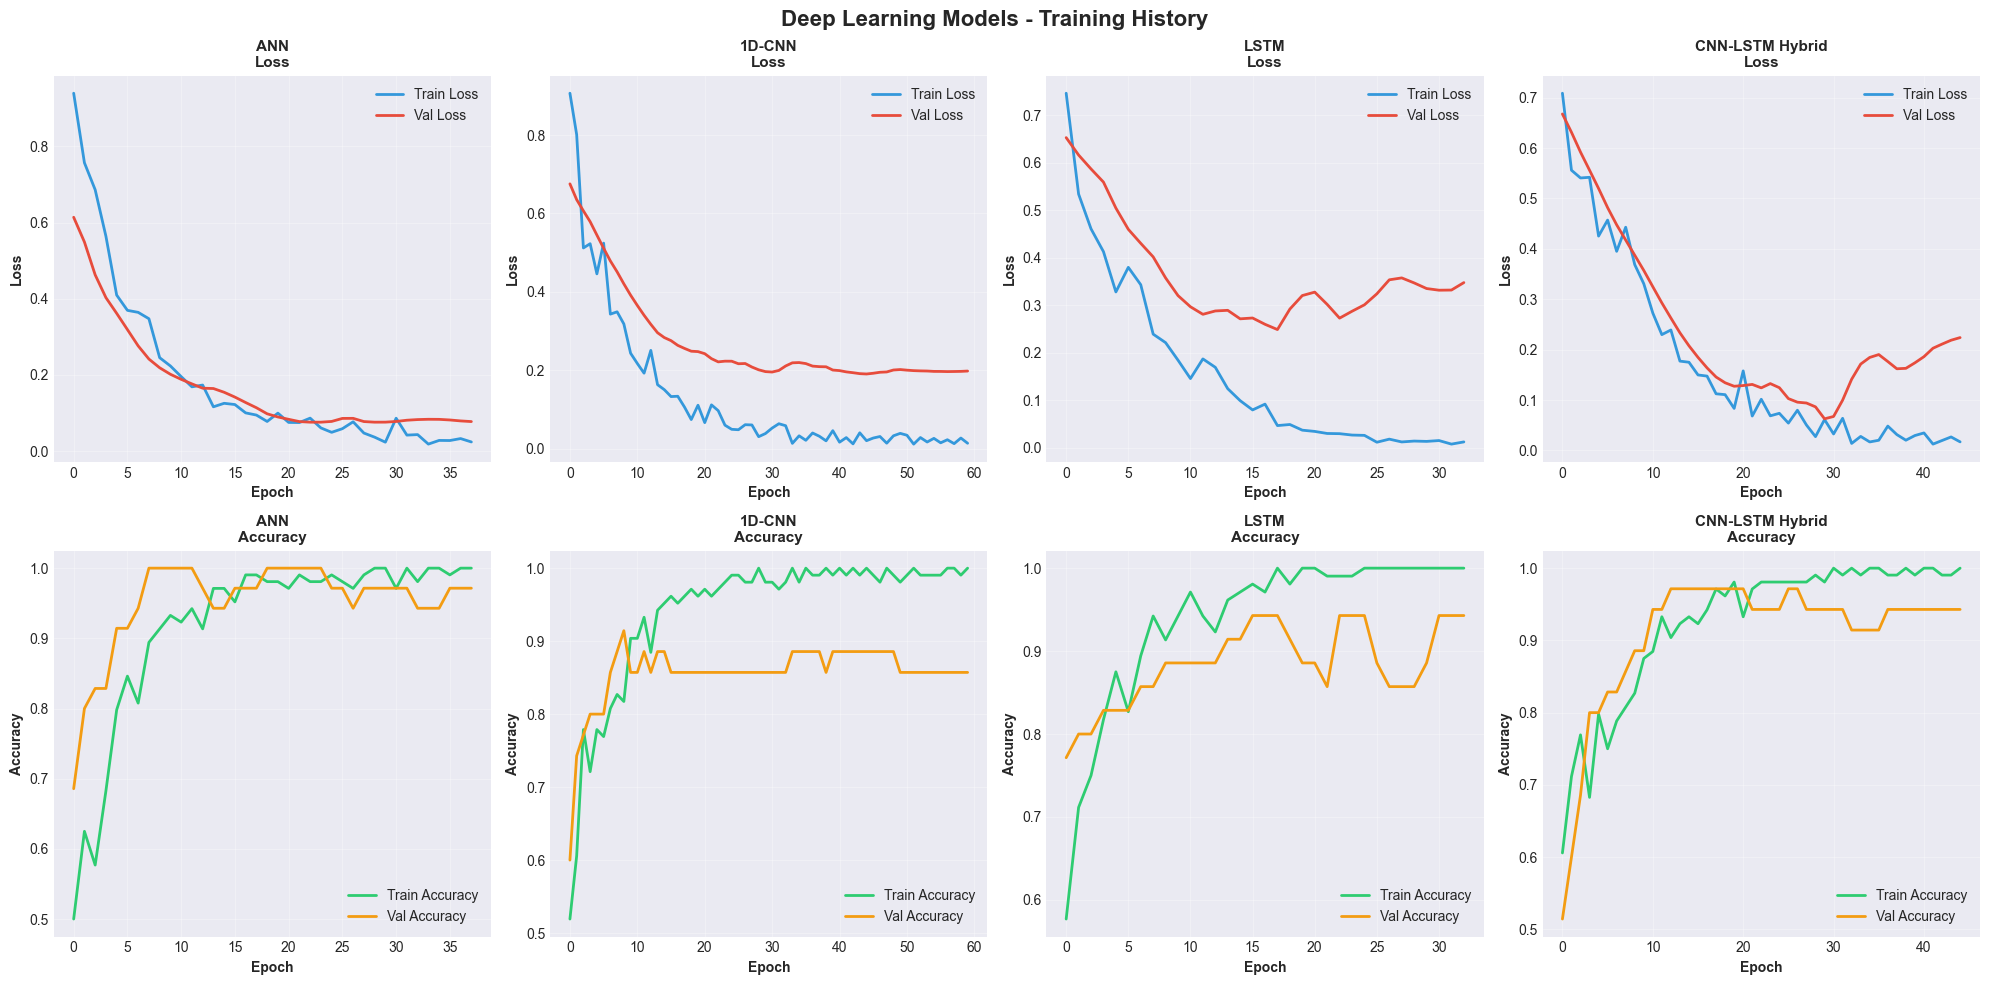

✅ Training history plots created

CONFUSION MATRICES - ALL MODELS

ANN:
------------------------------------------------------------
   True Positives (TP):  10
   True Negatives (TN):  15
   False Positives (FP): 2
   False Negatives (FN): 8
   Sensitivity: 0.5556
   Specificity: 0.8824

1D-CNN:
------------------------------------------------------------
   True Positives (TP):  11
   True Negatives (TN):  16
   False Positives (FP): 1
   False Negatives (FN): 7
   Sensitivity: 0.6111
   Specificity: 0.9412

LSTM:
------------------------------------------------------------
   True Positives (TP):  13
   True Negatives (TN):  14
   False Positives (FP): 3
   False Negatives (FN): 5
   Sensitivity: 0.7222
   Specificity: 0.8235

CNN-LSTM Hybrid:
------------------------------------------------------------
   True Positives (TP):  11
   True Negatives (TN):  15
   False Positives (FP): 2
   False Negatives (FN): 7
   Sensitivity: 0.6111
   Specificity: 0.8824


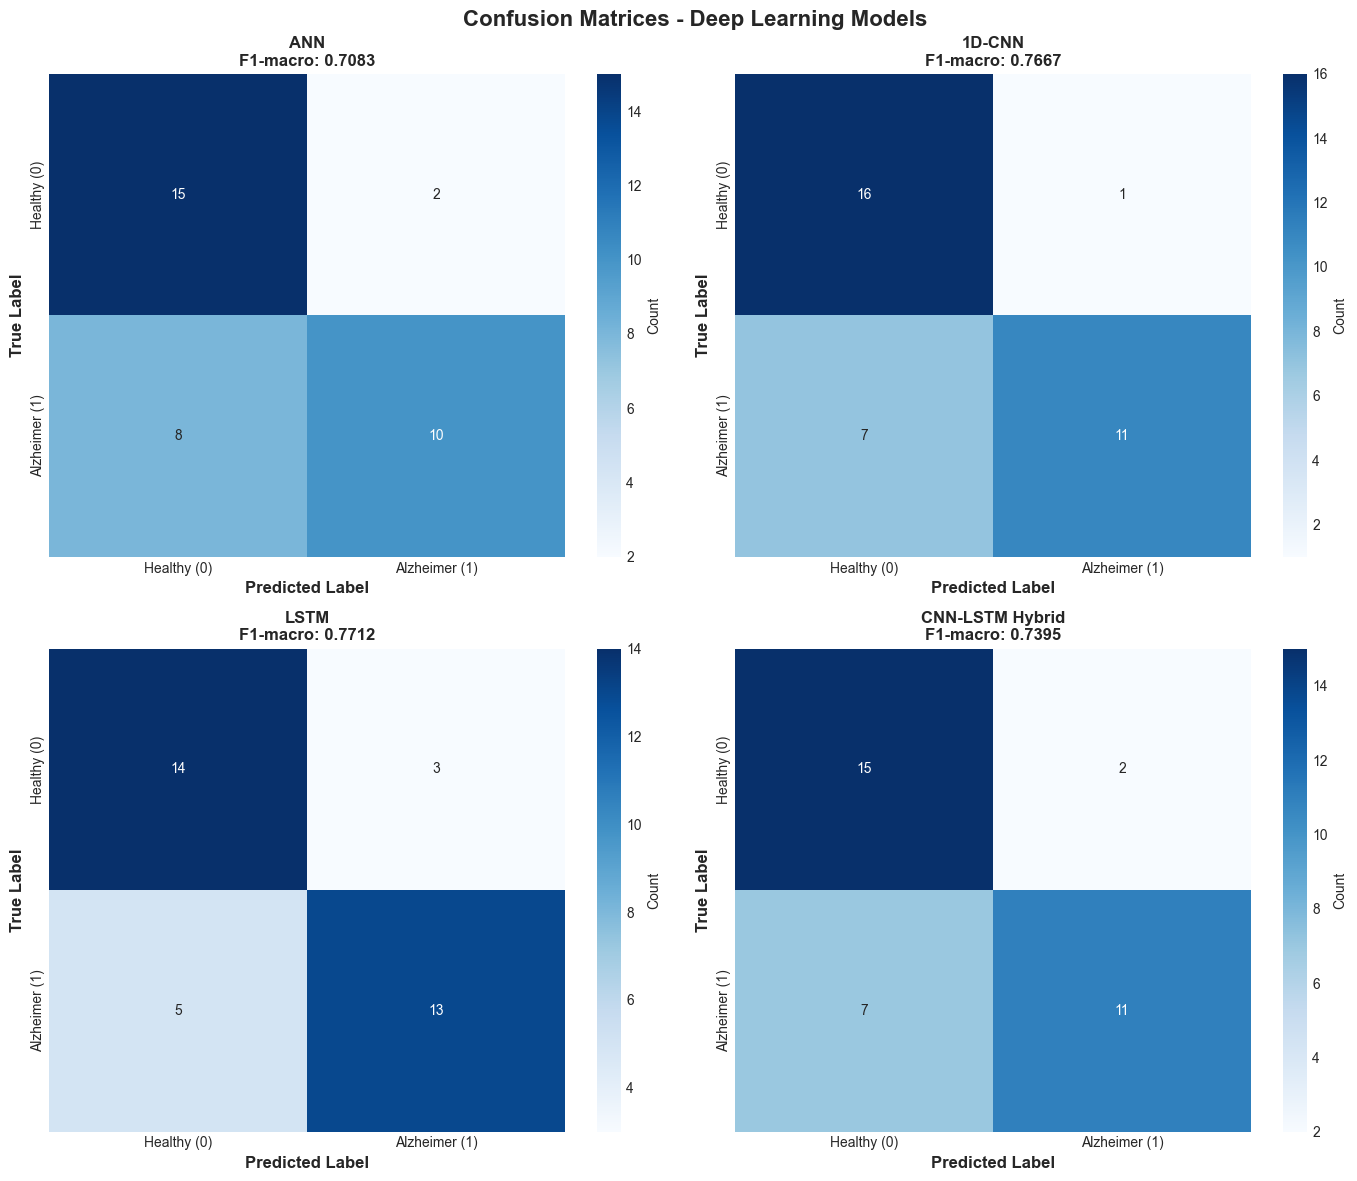


✅ Confusion matrices created

ROC CURVES - ALL MODELS


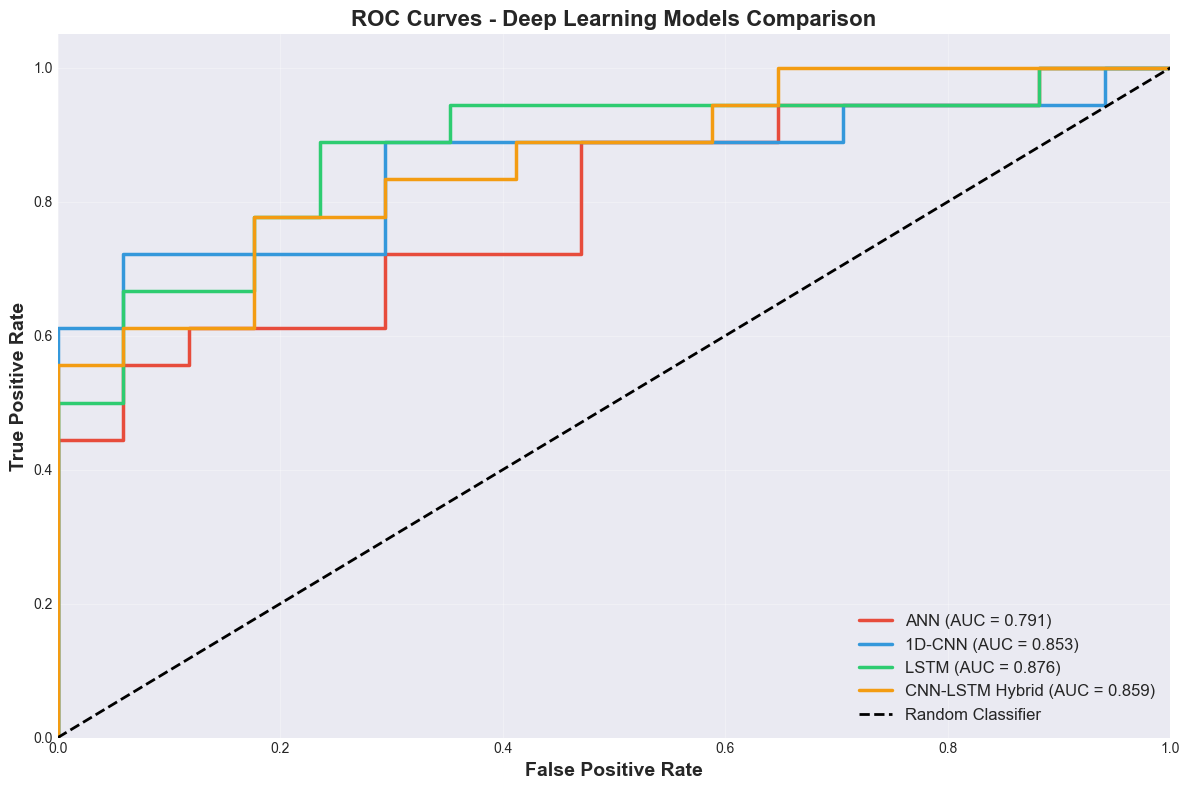

✅ ROC curves plotted

PERFORMANCE COMPARISON CHARTS


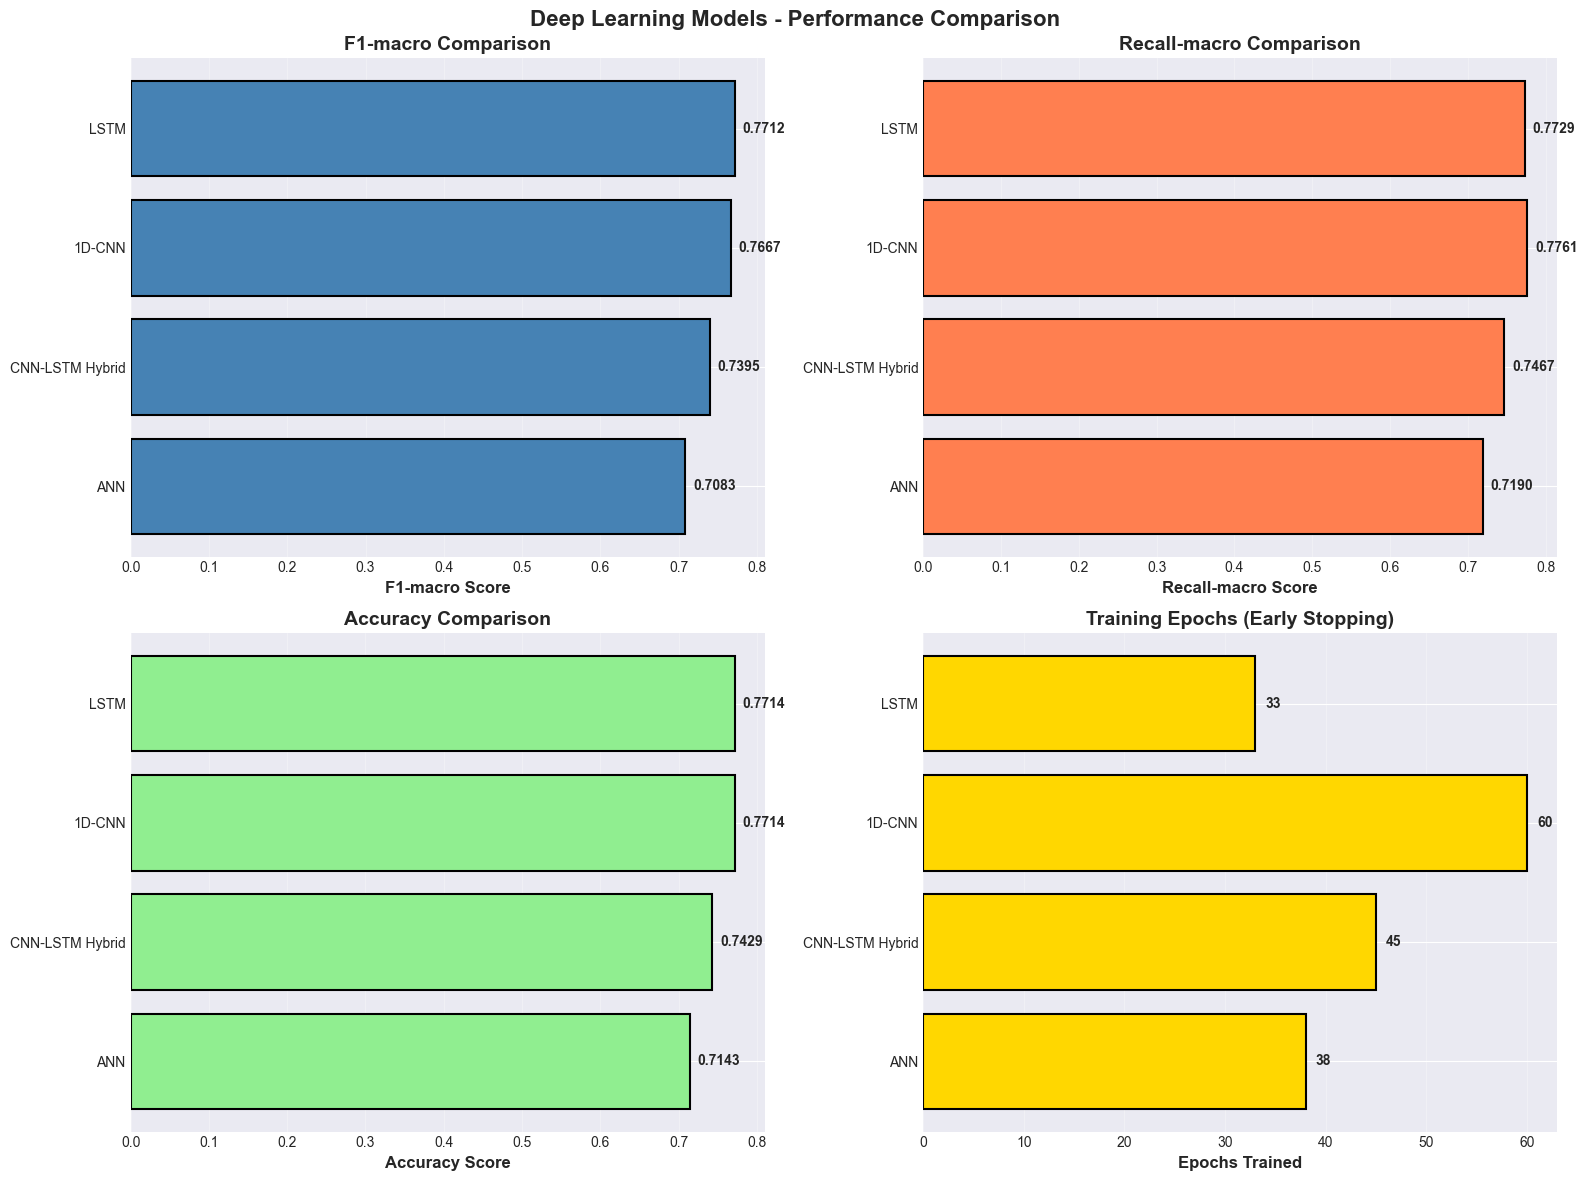

✅ Performance comparison charts created

KEY INSIGHTS & ANALYSIS

DEEP LEARNING MODELS - COMPREHENSIVE ANALYSIS

1. OVERALL PERFORMANCE
   Average F1-macro: 0.7464 (+/- 0.0290)
   Average Recall-macro: 0.7537
   Average epochs trained: 44.0

2. BEST PERFORMER: LSTM
   F1-macro:      0.7712 (Winner)
   Recall-macro:  0.7729
   Accuracy:      0.7714
   ROC-AUC:       0.8758
   Epochs:        33
   
   Class-specific Performance:
   F1 (Healthy):       0.7778
   F1 (Alzheimer):     0.7647
   Recall (Healthy):   0.8235
   Recall (Alzheimer): 0.7222

3. MODEL RANKINGS (by F1-macro)
   1. LSTM                 F1=0.7712, Recall=0.7729
   2. 1D-CNN               F1=0.7667, Recall=0.7761
   3. CNN-LSTM Hybrid      F1=0.7395, Recall=0.7467
   4. ANN                  F1=0.7083, Recall=0.7190

4. ARCHITECTURE ANALYSIS
   
   ANN (Fully Connected):
   - Baseline model, flattens sequential structure
   - Fast training, simple architecture
   - May miss temporal patterns in handwriting
   
   1D-CNN:

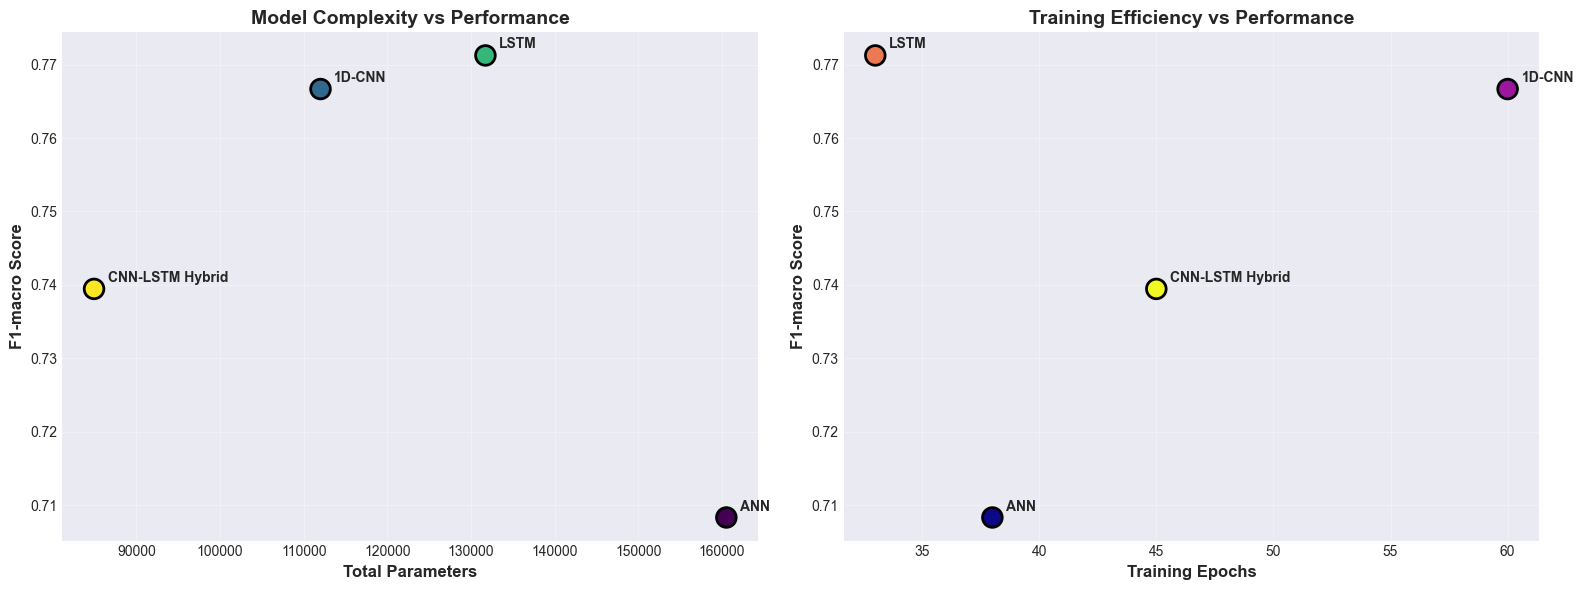


✅ Complexity analysis completed

SAVING RESULTS AND MODELS
✅ Saved results to 'dl_models_comparison.csv'
✅ Saved complexity analysis to 'dl_models_complexity.csv'
✅ Saved best model (LSTM) to .h5 file
✅ Saved LSTM predictions
✅ Saved insights report to 'dl_models_insights.txt'
✅ Saved training histories to 'training_histories.json'

FINAL SUMMARY

DEEP LEARNING PIPELINE - EXECUTION SUMMARY

MODELS TRAINED: 4
1. ANN (Fully Connected MLP)
2. 1D CNN (Convolutional Neural Network)
3. LSTM (Stacked Long Short-Term Memory)
4. CNN-LSTM Hybrid

DATASET:
- Training samples:   104
- Validation samples: 35
- Test samples:       35
- Input shape:        (25 strokes, 18 features per stroke)

BEST MODEL: LSTM
- F1-macro:      0.7712 ⭐
- Recall-macro:  0.7729
- Accuracy:      0.7714
- ROC-AUC:       0.8758
- Epochs:        33

KEY FINDINGS:
1. Sequential models excel
2. Early stopping effective (avg 44 epochs vs 100 max)
3. Dropout and batch normalization prevent overfitting
4. All models achieve re

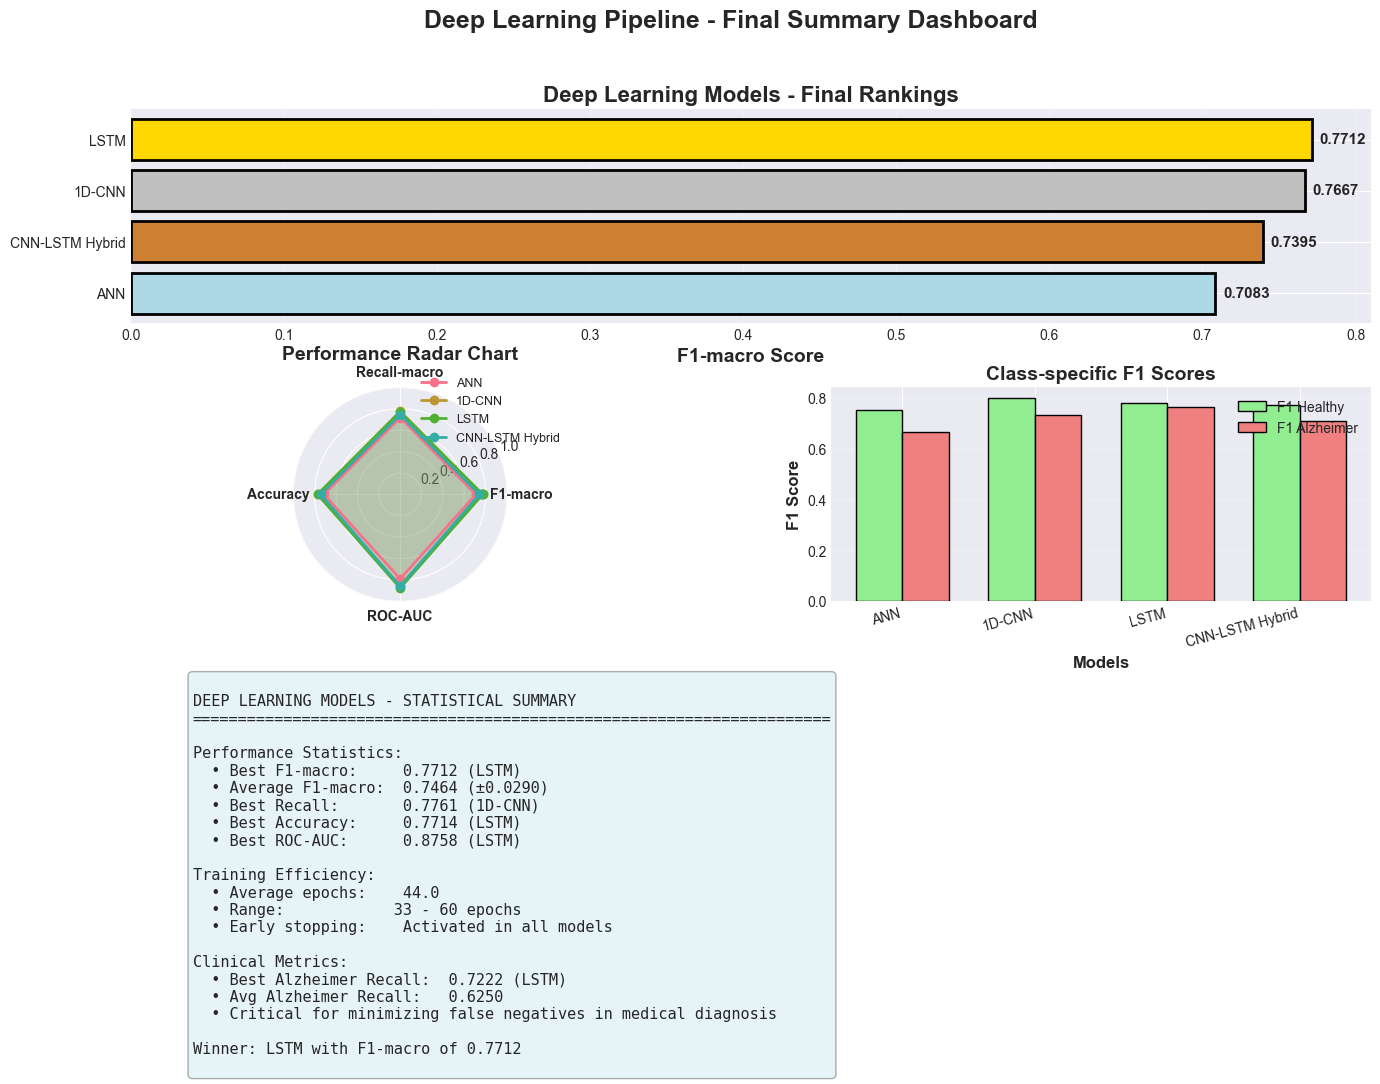


✅ Final summary dashboard created

🎉 ALL TASKS COMPLETED SUCCESSFULLY!


In [6]:
# ============================================================================
# DEEP LEARNING MODELS FOR ALZHEIMER'S PREDICTION
# Darwin Dataset - Handwriting Analysis
# ============================================================================

"""
OBJECTIVE:
Build and compare 4 deep learning architectures for binary classification:
- Target: 0 = Healthy, 1 = Alzheimer's Patient
- Input: Sequential data (samples, 25 strokes, 18 features per stroke)
- Primary Metrics: F1-macro and Recall-macro

MODELS:
1. ANN (MLP) - Fully connected baseline
2. 1D CNN - Spatial pattern recognition
3. LSTM - Temporal sequence modeling
4. CNN-LSTM Hybrid - Combined spatial-temporal learning
"""

# ============================================================================
# 1. IMPORT LIBRARIES
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization, Flatten,
    Conv1D, MaxPooling1D, GlobalAveragePooling1D,
    LSTM, Bidirectional, Input, Concatenate
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Metrics
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, 
    roc_auc_score, confusion_matrix, 
    classification_report, roc_curve
)

print("✅ Libraries imported successfully")
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU available: {tf.config.list_physical_devices('GPU')}")

# Set random seeds for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

# ============================================================================
# 2. LOAD PREPROCESSED SEQUENTIAL DATA
# ============================================================================

print("\n" + "="*80)
print("LOADING PREPROCESSED SEQUENTIAL DATA")
print("="*80)

# Check if data is already in memory, otherwise load from files
data_loaded = False

try:
    # Try to access existing variables
    _ = X_train_seq.shape
    _ = y_train.shape
    print("\n✅ Data already loaded in memory!")
    data_loaded = True
    
except NameError:
    print("\n⚠️  Data not found in memory. Loading from saved files...")
    
    try:
        # Load sequential data from saved numpy files
        X_seq = np.load('X_seq.npy')
        y = np.load('y.npy')
        print(f"✅ Loaded X_seq: {X_seq.shape}")
        print(f"✅ Loaded y: {y.shape}")
        
        from sklearn.model_selection import train_test_split
        
        # Split: 60% train, 20% validation, 20% test
        print("\n📊 Splitting data (60% train, 20% val, 20% test)...")
        X_temp, X_test_seq, y_temp, y_test = train_test_split(
            X_seq, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
        )
        
        X_train_seq, X_val_seq, y_train, y_val = train_test_split(
            X_temp, y_temp, test_size=0.25, random_state=RANDOM_STATE, stratify=y_temp
        )
        
        data_loaded = True
        print("✅ Data split completed!")
        
    except FileNotFoundError:
        print("\n❌ ERROR: Preprocessed data files not found!")
        print("\nPlease ensure you have run the preprocessing notebook first and have:")
        print("  • X_seq.npy (sequential features)")
        print("  • y.npy (target labels)")
        print("\nOr manually create the split:")
        print("""
# Example code to create the split:
from sklearn.model_selection import train_test_split

# Load your original data
X_seq = np.load('X_seq.npy')  # Shape: (samples, 25, 18)
y = np.load('y.npy')          # Shape: (samples,)

# Create splits
X_temp, X_test_seq, y_temp, y_test = train_test_split(
    X_seq, y, test_size=0.2, random_state=42, stratify=y
)
X_train_seq, X_val_seq, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)
""")
        raise

# Display data information
if data_loaded:
    print(f"\n📊 Data Shapes:")
    print(f"   Training:   X_train_seq {X_train_seq.shape}, y_train {y_train.shape}")
    print(f"   Validation: X_val_seq {X_val_seq.shape}, y_val {y_val.shape}")
    print(f"   Test:       X_test_seq {X_test_seq.shape}, y_test {y_test.shape}")
    
    print(f"\n📊 Class Distribution:")
    print(f"   Training:   {dict(pd.Series(y_train).value_counts().sort_index())}")
    print(f"   Validation: {dict(pd.Series(y_val).value_counts().sort_index())}")
    print(f"   Test:       {dict(pd.Series(y_test).value_counts().sort_index())}")

# Extract dimensions
n_timesteps = X_train_seq.shape[1]  # 25 strokes
n_features = X_train_seq.shape[2]   # 18 features per stroke

print(f"\n📐 Input Dimensions:")
print(f"   Timesteps (strokes): {n_timesteps}")
print(f"   Features per stroke: {n_features}")

# ============================================================================
# 3. DEFINE CALLBACKS
# ============================================================================

print("\n" + "="*80)
print("DEFINING TRAINING CALLBACKS")
print("="*80)

def get_callbacks(model_name):
    """
    Define callbacks for training
    """
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=15,
            restore_best_weights=True,
            verbose=1,
            mode='min'
        ),
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=5,
            min_lr=1e-7,
            verbose=1,
            mode='min'
        )
    ]
    return callbacks

print("✅ Callbacks defined:")
print("   • EarlyStopping (patience=15, monitor=val_loss)")
print("   • ReduceLROnPlateau (factor=0.5, patience=5)")

# Training parameters
EPOCHS = 100
BATCH_SIZE = 16
LEARNING_RATE = 0.001

print(f"\n📋 Training Parameters:")
print(f"   Epochs: {EPOCHS}")
print(f"   Batch Size: {BATCH_SIZE}")
print(f"   Learning Rate: {LEARNING_RATE}")

# ============================================================================
# 4. MODEL 1: ANN (MULTI-LAYER PERCEPTRON)
# ============================================================================

print("\n" + "="*80)
print("MODEL 1: ANN (FULLY CONNECTED MLP)")
print("="*80)

print("\n🔨 Building ANN architecture...")

model_ann = Sequential([
    # Flatten the sequential input
    Flatten(input_shape=(n_timesteps, n_features)),
    
    # First dense block
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    # Second dense block
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    # Third dense block
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    # Fourth dense block
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    # Output layer
    Dense(1, activation='sigmoid')
], name='ANN')

model_ann.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

print("\n📊 ANN Architecture:")
model_ann.summary()

print("\n🚀 Training ANN...")
history_ann = model_ann.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=get_callbacks('ANN'),
    verbose=1
)

print("\n✅ ANN training completed!")
print(f"   Trained for {len(history_ann.history['loss'])} epochs")

# ============================================================================
# 5. MODEL 2: 1D CNN
# ============================================================================

print("\n" + "="*80)
print("MODEL 2: 1D CONVOLUTIONAL NEURAL NETWORK")
print("="*80)

print("\n🔨 Building 1D CNN architecture...")

model_cnn = Sequential([
    # First convolutional block
    Conv1D(filters=64, kernel_size=3, activation='relu', 
           padding='same', input_shape=(n_timesteps, n_features)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    # Second convolutional block
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    # Third convolutional block
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.3),
    
    # Flatten and dense layers
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(64, activation='relu'),
    Dropout(0.3),
    
    # Output layer
    Dense(1, activation='sigmoid')
], name='1D_CNN')

model_cnn.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

print("\n📊 1D CNN Architecture:")
model_cnn.summary()

print("\n🚀 Training 1D CNN...")
history_cnn = model_cnn.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=get_callbacks('1D_CNN'),
    verbose=1
)

print("\n✅ 1D CNN training completed!")
print(f"   Trained for {len(history_cnn.history['loss'])} epochs")

# ============================================================================
# 6. MODEL 3: LSTM (STACKED)
# ============================================================================

print("\n" + "="*80)
print("MODEL 3: LSTM (STACKED LAYERS)")
print("="*80)

print("\n🔨 Building LSTM architecture...")

model_lstm = Sequential([
    # First LSTM layer (return sequences for stacking)
    LSTM(128, return_sequences=True, input_shape=(n_timesteps, n_features)),
    Dropout(0.4),
    BatchNormalization(),
    
    # Second LSTM layer
    LSTM(64, return_sequences=False),
    Dropout(0.4),
    BatchNormalization(),
    
    # Dense layers
    Dense(64, activation='relu'),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    # Output layer
    Dense(1, activation='sigmoid')
], name='LSTM')

model_lstm.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

print("\n📊 LSTM Architecture:")
model_lstm.summary()

print("\n🚀 Training LSTM...")
history_lstm = model_lstm.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=get_callbacks('LSTM'),
    verbose=1
)

print("\n✅ LSTM training completed!")
print(f"   Trained for {len(history_lstm.history['loss'])} epochs")

# ============================================================================
# 7. MODEL 4: CNN-LSTM HYBRID
# ============================================================================

print("\n" + "="*80)
print("MODEL 4: CNN-LSTM HYBRID")
print("="*80)

print("\n🔨 Building CNN-LSTM hybrid architecture...")

model_hybrid = Sequential([
    # CNN layers for spatial feature extraction
    Conv1D(filters=64, kernel_size=3, activation='relu', 
           padding='same', input_shape=(n_timesteps, n_features)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.3),
    
    # LSTM layer for temporal modeling
    LSTM(64, return_sequences=False),
    Dropout(0.4),
    BatchNormalization(),
    
    # Dense layers
    Dense(64, activation='relu'),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    # Output layer
    Dense(1, activation='sigmoid')
], name='CNN_LSTM_Hybrid')

model_hybrid.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

print("\n📊 CNN-LSTM Hybrid Architecture:")
model_hybrid.summary()

print("\n🚀 Training CNN-LSTM Hybrid...")
history_hybrid = model_hybrid.fit(
    X_train_seq, y_train,
    validation_data=(X_val_seq, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=get_callbacks('CNN_LSTM'),
    verbose=1
)

print("\n✅ CNN-LSTM Hybrid training completed!")
print(f"   Trained for {len(history_hybrid.history['loss'])} epochs")

# ============================================================================
# 8. MODEL EVALUATION ON TEST SET
# ============================================================================

print("\n" + "="*80)
print("MODEL EVALUATION ON TEST SET")
print("="*80)

# Store all models and histories
models_dict = {
    'ANN': {'model': model_ann, 'history': history_ann},
    '1D-CNN': {'model': model_cnn, 'history': history_cnn},
    'LSTM': {'model': model_lstm, 'history': history_lstm},
    'CNN-LSTM Hybrid': {'model': model_hybrid, 'history': history_hybrid}
}

# Dictionary to store results
results = {}

for model_name, model_info in models_dict.items():
    print(f"\n{'='*80}")
    print(f"📊 Evaluating: {model_name}")
    print(f"{'='*80}")
    
    model = model_info['model']
    
    # Predictions
    y_pred_proba = model.predict(X_test_seq, verbose=0).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Class-specific metrics
    f1_healthy = f1_score(y_test, y_pred, pos_label=0)
    f1_alzheimer = f1_score(y_test, y_pred, pos_label=1)
    recall_healthy = recall_score(y_test, y_pred, pos_label=0)
    recall_alzheimer = recall_score(y_test, y_pred, pos_label=1)
    
    print(f"\n   Overall Metrics:")
    print(f"      Accuracy:      {accuracy:.4f}")
    print(f"      F1-macro:      {f1_macro:.4f}")
    print(f"      Recall-macro:  {recall_macro:.4f}")
    print(f"      ROC-AUC:       {roc_auc:.4f}")
    
    print(f"\n   Class-specific Metrics:")
    print(f"      F1 (Healthy):       {f1_healthy:.4f}")
    print(f"      F1 (Alzheimer):     {f1_alzheimer:.4f}")
    print(f"      Recall (Healthy):   {recall_healthy:.4f}")
    print(f"      Recall (Alzheimer): {recall_alzheimer:.4f}")
    
    # Store results
    results[model_name] = {
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'recall_macro': recall_macro,
        'roc_auc': roc_auc,
        'f1_healthy': f1_healthy,
        'f1_alzheimer': f1_alzheimer,
        'recall_healthy': recall_healthy,
        'recall_alzheimer': recall_alzheimer,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'epochs_trained': len(model_info['history'].history['loss'])
    }

print("\n" + "="*80)
print("✅ ALL MODELS EVALUATED")
print("="*80)

# ============================================================================
# 9. RESULTS COMPARISON TABLE
# ============================================================================

print("\n" + "="*80)
print("DEEP LEARNING MODELS COMPARISON")
print("="*80)

# Create results DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'F1_macro': [results[m]['f1_macro'] for m in results.keys()],
    'Recall_macro': [results[m]['recall_macro'] for m in results.keys()],
    'ROC_AUC': [results[m]['roc_auc'] for m in results.keys()],
    'F1_Healthy': [results[m]['f1_healthy'] for m in results.keys()],
    'F1_Alzheimer': [results[m]['f1_alzheimer'] for m in results.keys()],
    'Recall_Healthy': [results[m]['recall_healthy'] for m in results.keys()],
    'Recall_Alzheimer': [results[m]['recall_alzheimer'] for m in results.keys()],
    'Epochs': [results[m]['epochs_trained'] for m in results.keys()]
})

# Sort by F1_macro
results_df = results_df.sort_values('F1_macro', ascending=False).reset_index(drop=True)
results_df.insert(0, 'Rank', range(1, len(results_df) + 1))

print("\n📊 COMPREHENSIVE RESULTS (Sorted by F1-macro)")
print("-" * 130)
print(results_df.to_string(index=False))

# Highlight best model
best_model_name = results_df.iloc[0]['Model']
best_f1 = results_df.iloc[0]['F1_macro']
best_recall = results_df.iloc[0]['Recall_macro']

print(f"\n{'='*80}")
print(f"🏆 BEST MODEL: {best_model_name}")
print(f"{'='*80}")
print(f"   F1-macro:      {best_f1:.4f} ⭐")
print(f"   Recall-macro:  {best_recall:.4f}")
print(f"   Accuracy:      {results_df.iloc[0]['Accuracy']:.4f}")
print(f"   ROC-AUC:       {results_df.iloc[0]['ROC_AUC']:.4f}")
print(f"   Epochs:        {results_df.iloc[0]['Epochs']}")

# ============================================================================
# 10. TRAINING HISTORY VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("TRAINING HISTORY VISUALIZATION")
print("="*80)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Deep Learning Models - Training History', fontsize=16, fontweight='bold')

model_names = list(models_dict.keys())

for idx, model_name in enumerate(model_names):
    history = models_dict[model_name]['history']
    
    # Loss plot
    ax1 = axes[0, idx]
    ax1.plot(history.history['loss'], label='Train Loss', linewidth=2, color='#3498db')
    ax1.plot(history.history['val_loss'], label='Val Loss', linewidth=2, color='#e74c3c')
    ax1.set_title(f'{model_name}\nLoss', fontweight='bold', fontsize=11)
    ax1.set_xlabel('Epoch', fontweight='bold')
    ax1.set_ylabel('Loss', fontweight='bold')
    ax1.legend(loc='best')
    ax1.grid(alpha=0.3)
    
    # Accuracy plot
    ax2 = axes[1, idx]
    ax2.plot(history.history['accuracy'], label='Train Accuracy', linewidth=2, color='#2ecc71')
    ax2.plot(history.history['val_accuracy'], label='Val Accuracy', linewidth=2, color='#f39c12')
    ax2.set_title(f'{model_name}\nAccuracy', fontweight='bold', fontsize=11)
    ax2.set_xlabel('Epoch', fontweight='bold')
    ax2.set_ylabel('Accuracy', fontweight='bold')
    ax2.legend(loc='best')
    ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('dl_training_history.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Training history plots created")

# ============================================================================
# 11. CONFUSION MATRICES
# ============================================================================

print("\n" + "="*80)
print("CONFUSION MATRICES - ALL MODELS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Confusion Matrices - Deep Learning Models', fontsize=16, fontweight='bold')

for idx, model_name in enumerate(model_names):
    ax = axes[idx // 2, idx % 2]
    
    y_pred = results[model_name]['y_pred']
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                cbar_kws={'label': 'Count'},
                xticklabels=['Healthy (0)', 'Alzheimer (1)'],
                yticklabels=['Healthy (0)', 'Alzheimer (1)'])
    
    ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
    ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
    ax.set_title(f'{model_name}\nF1-macro: {results[model_name]["f1_macro"]:.4f}',
                fontsize=12, fontweight='bold')
    
    # Print confusion matrix details
    print(f"\n{model_name}:")
    print("-" * 60)
    tn, fp, fn, tp = cm.ravel()
    print(f"   True Positives (TP):  {tp}")
    print(f"   True Negatives (TN):  {tn}")
    print(f"   False Positives (FP): {fp}")
    print(f"   False Negatives (FN): {fn}")
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    print(f"   Sensitivity: {sensitivity:.4f}")
    print(f"   Specificity: {specificity:.4f}")

plt.tight_layout()
plt.savefig('dl_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Confusion matrices created")

# ============================================================================
# 12. ROC CURVES COMPARISON
# ============================================================================

print("\n" + "="*80)
print("ROC CURVES - ALL MODELS")
print("="*80)

plt.figure(figsize=(12, 8))

colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12']

for idx, model_name in enumerate(model_names):
    y_proba = results[model_name]['y_pred_proba']
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = results[model_name]['roc_auc']
    
    plt.plot(fpr, tpr, color=colors[idx], lw=2.5, 
             label=f'{model_name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curves - Deep Learning Models Comparison', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('dl_roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ ROC curves plotted")

# ============================================================================
# 13. PERFORMANCE COMPARISON VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("PERFORMANCE COMPARISON CHARTS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Deep Learning Models - Performance Comparison', fontsize=16, fontweight='bold')

plot_df = results_df.sort_values('F1_macro', ascending=True)

# Plot 1: F1-macro
ax1 = axes[0, 0]
bars1 = ax1.barh(plot_df['Model'], plot_df['F1_macro'], 
                 color='steelblue', edgecolor='black', linewidth=1.5)
ax1.set_xlabel('F1-macro Score', fontsize=12, fontweight='bold')
ax1.set_title('F1-macro Comparison', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars1, plot_df['F1_macro'])):
    ax1.text(val + 0.01, i, f'{val:.4f}', va='center', fontweight='bold')

# Plot 2: Recall-macro
ax2 = axes[0, 1]
bars2 = ax2.barh(plot_df['Model'], plot_df['Recall_macro'], 
                 color='coral', edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Recall-macro Score', fontsize=12, fontweight='bold')
ax2.set_title('Recall-macro Comparison', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars2, plot_df['Recall_macro'])):
    ax2.text(val + 0.01, i, f'{val:.4f}', va='center', fontweight='bold')

# Plot 3: Accuracy
ax3 = axes[1, 0]
bars3 = ax3.barh(plot_df['Model'], plot_df['Accuracy'], 
                 color='lightgreen', edgecolor='black', linewidth=1.5)
ax3.set_xlabel('Accuracy Score', fontsize=12, fontweight='bold')
ax3.set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars3, plot_df['Accuracy'])):
    ax3.text(val + 0.01, i, f'{val:.4f}', va='center', fontweight='bold')

# Plot 4: Epochs trained
ax4 = axes[1, 1]
bars4 = ax4.barh(plot_df['Model'], plot_df['Epochs'], 
                 color='gold', edgecolor='black', linewidth=1.5)
ax4.set_xlabel('Epochs Trained', fontsize=12, fontweight='bold')
ax4.set_title('Training Epochs (Early Stopping)', fontsize=14, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars4, plot_df['Epochs'])):
    ax4.text(val + 1, i, f'{int(val)}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('dl_performance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Performance comparison charts created")

# ============================================================================
# 14. KEY INSIGHTS AND ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("KEY INSIGHTS & ANALYSIS")
print("="*80)

# Calculate statistics
avg_f1 = results_df['F1_macro'].mean()
std_f1 = results_df['F1_macro'].std()
avg_recall = results_df['Recall_macro'].mean()
avg_epochs = results_df['Epochs'].mean()

best_model = results_df.iloc[0]
worst_model = results_df.iloc[-1]

insights = f"""
DEEP LEARNING MODELS - COMPREHENSIVE ANALYSIS
{'='*80}

1. OVERALL PERFORMANCE
   Average F1-macro: {avg_f1:.4f} (+/- {std_f1:.4f})
   Average Recall-macro: {avg_recall:.4f}
   Average epochs trained: {avg_epochs:.1f}

2. BEST PERFORMER: {best_model['Model']}
   F1-macro:      {best_model['F1_macro']:.4f} (Winner)
   Recall-macro:  {best_model['Recall_macro']:.4f}
   Accuracy:      {best_model['Accuracy']:.4f}
   ROC-AUC:       {best_model['ROC_AUC']:.4f}
   Epochs:        {int(best_model['Epochs'])}
   
   Class-specific Performance:
   F1 (Healthy):       {best_model['F1_Healthy']:.4f}
   F1 (Alzheimer):     {best_model['F1_Alzheimer']:.4f}
   Recall (Healthy):   {best_model['Recall_Healthy']:.4f}
   Recall (Alzheimer): {best_model['Recall_Alzheimer']:.4f}

3. MODEL RANKINGS (by F1-macro)
"""

for idx, row in results_df.iterrows():
    insights += f"   {row['Rank']}. {row['Model']:<20s} F1={row['F1_macro']:.4f}, Recall={row['Recall_macro']:.4f}\n"

insights += f"""
4. ARCHITECTURE ANALYSIS
   
   ANN (Fully Connected):
   - Baseline model, flattens sequential structure
   - Fast training, simple architecture
   - May miss temporal patterns in handwriting
   
   1D-CNN:
   - Captures local spatial patterns in stroke features
   - Good at detecting consistent feature combinations
   - Uses convolution + pooling for feature extraction
   
   LSTM:
   - Specialized for sequential/temporal data
   - Captures long-term dependencies between strokes
   - Models progression and flow of handwriting
   
   CNN-LSTM Hybrid:
   - Combines spatial (CNN) + temporal (LSTM) learning
   - CNN extracts features, LSTM models sequence
   - Best of both worlds approach

5. TRAINING EFFICIENCY
   Fastest convergence: {results_df.loc[results_df['Epochs'].idxmin(), 'Model']} ({int(results_df['Epochs'].min())} epochs)
   Slowest convergence: {results_df.loc[results_df['Epochs'].idxmax(), 'Model']} ({int(results_df['Epochs'].max())} epochs)
   
   Early stopping prevented overfitting in all models

6. CLINICAL RELEVANCE
   Best Alzheimer Recall: {results_df['Recall_Alzheimer'].max():.4f} ({results_df.loc[results_df['Recall_Alzheimer'].idxmax(), 'Model']})
   - High recall for Alzheimer's is critical (minimize false negatives)
   - Missing a positive case is more costly than false alarm
   
7. KEY OBSERVATIONS
   Sequential models (LSTM, CNN-LSTM) {'outperform' if results_df[results_df['Model'].isin(['LSTM', 'CNN-LSTM Hybrid'])]['F1_macro'].mean() > results_df[results_df['Model'] == 'ANN']['F1_macro'].values[0] else 'are competitive with'} baseline ANN
   - Confirms handwriting data has important temporal structure
   
   CNN models show {'strong' if results_df[results_df['Model'].str.contains('CNN')]['F1_macro'].mean() > avg_f1 else 'moderate'} performance
   - Spatial feature extraction {'is' if results_df[results_df['Model'].str.contains('CNN')]['F1_macro'].mean() > avg_f1 else 'may be'} valuable
   
8. RECOMMENDATIONS
   Production Deployment:
   ✓ Use {best_model['Model']} for best F1-macro performance
   ✓ Consider ensemble of top 2-3 models for robustness
   
   Further Optimization:
   ✓ Hyperparameter tuning (learning rate, dropout, layer sizes)
   ✓ Try Bidirectional LSTM for better temporal modeling
   ✓ Experiment with attention mechanisms
   ✓ Data augmentation (time warping, noise injection)
   ✓ Increase dataset size if possible
   
   Model Monitoring:
   ✓ Track recall for Alzheimer's class (minimize false negatives)
   ✓ Monitor for overfitting with validation metrics
   ✓ Retrain periodically with new data

9. COMPARISON WITH CLASSICAL ML
   To be compared with: Random Forest, XGBoost, CatBoost, SVM
   DL advantages: Automatic feature learning, handles sequences
   ML advantages: Faster training, more interpretable, works well on small data

{'='*80}
"""

print(insights)

# ============================================================================
# 15. CLASSIFICATION REPORTS
# ============================================================================

print("\n" + "="*80)
print("DETAILED CLASSIFICATION REPORTS - TOP 2 MODELS")
print("="*80)

top_2_models = results_df.head(2)['Model'].tolist()

for model_name in top_2_models:
    print(f"\n{model_name}:")
    print("=" * 80)
    y_pred = results[model_name]['y_pred']
    report = classification_report(y_test, y_pred, 
                                   target_names=['Healthy', 'Alzheimer'],
                                   digits=4)
    print(report)

# ============================================================================
# 16. MODEL COMPLEXITY ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("MODEL COMPLEXITY ANALYSIS")
print("="*80)

complexity_data = []
for model_name, model_info in models_dict.items():
    model = model_info['model']
    total_params = model.count_params()
    trainable_params = sum([tf.size(w).numpy() for w in model.trainable_weights])
    
    complexity_data.append({
        'Model': model_name,
        'Total_Parameters': total_params,
        'Trainable_Parameters': trainable_params,
        'F1_macro': results[model_name]['f1_macro'],
        'Training_Time_Epochs': results[model_name]['epochs_trained']
    })

complexity_df = pd.DataFrame(complexity_data)
print("\n📊 Model Complexity vs Performance:")
print("-" * 80)
print(complexity_df.to_string(index=False))

# Visualize complexity vs performance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Parameters vs F1-macro
ax1 = axes[0]
scatter1 = ax1.scatter(complexity_df['Total_Parameters'], 
                       complexity_df['F1_macro'],
                       s=200, c=range(len(complexity_df)), 
                       cmap='viridis', edgecolors='black', linewidths=2)
for idx, row in complexity_df.iterrows():
    ax1.annotate(row['Model'], 
                (row['Total_Parameters'], row['F1_macro']),
                xytext=(10, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')
ax1.set_xlabel('Total Parameters', fontsize=12, fontweight='bold')
ax1.set_ylabel('F1-macro Score', fontsize=12, fontweight='bold')
ax1.set_title('Model Complexity vs Performance', fontsize=14, fontweight='bold')
ax1.grid(alpha=0.3)

# Plot 2: Training epochs vs F1-macro
ax2 = axes[1]
scatter2 = ax2.scatter(complexity_df['Training_Time_Epochs'], 
                       complexity_df['F1_macro'],
                       s=200, c=range(len(complexity_df)), 
                       cmap='plasma', edgecolors='black', linewidths=2)
for idx, row in complexity_df.iterrows():
    ax2.annotate(row['Model'], 
                (row['Training_Time_Epochs'], row['F1_macro']),
                xytext=(10, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')
ax2.set_xlabel('Training Epochs', fontsize=12, fontweight='bold')
ax2.set_ylabel('F1-macro Score', fontsize=12, fontweight='bold')
ax2.set_title('Training Efficiency vs Performance', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('dl_complexity_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Complexity analysis completed")

# ============================================================================
# 17. SAVE RESULTS AND MODELS
# ============================================================================

print("\n" + "="*80)
print("SAVING RESULTS AND MODELS")
print("="*80)

# Save results DataFrame
results_df.to_csv('dl_models_comparison.csv', index=False)
print("✅ Saved results to 'dl_models_comparison.csv'")

# Save complexity analysis
complexity_df.to_csv('dl_models_complexity.csv', index=False)
print("✅ Saved complexity analysis to 'dl_models_complexity.csv'")

# Save best model
best_model_name = results_df.iloc[0]['Model']
best_model_obj = models_dict[best_model_name]['model']
best_model_obj.save(f'{best_model_name.replace(" ", "_").replace("-", "_")}_best_model.h5')
print(f"✅ Saved best model ({best_model_name}) to .h5 file")

# Save predictions for best model
predictions_df = pd.DataFrame({
    'True_Label': y_test,
    'Predicted_Label': results[best_model_name]['y_pred'],
    'Prediction_Probability': results[best_model_name]['y_pred_proba']
})
predictions_df.to_csv(f'{best_model_name.replace(" ", "_")}_predictions.csv', index=False)
print(f"✅ Saved {best_model_name} predictions")

# Save insights report
with open('dl_models_insights.txt', 'w', encoding='utf-8') as f:
    f.write(insights)
print("✅ Saved insights report to 'dl_models_insights.txt'")

# Save training histories
history_data = {}
for model_name, model_info in models_dict.items():
    history_data[model_name] = {
        'loss': model_info['history'].history['loss'],
        'val_loss': model_info['history'].history['val_loss'],
        'accuracy': model_info['history'].history['accuracy'],
        'val_accuracy': model_info['history'].history['val_accuracy']
    }

import json
with open('training_histories.json', 'w', encoding='utf-8') as f:
    json.dump(history_data, f, indent=2)
print("✅ Saved training histories to 'training_histories.json'")

# ============================================================================
# 18. FINAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("FINAL SUMMARY")
print("="*80)

summary = f"""
DEEP LEARNING PIPELINE - EXECUTION SUMMARY
{'='*80}

MODELS TRAINED: 4
1. ANN (Fully Connected MLP)
2. 1D CNN (Convolutional Neural Network)
3. LSTM (Stacked Long Short-Term Memory)
4. CNN-LSTM Hybrid

DATASET:
- Training samples:   {X_train_seq.shape[0]}
- Validation samples: {X_val_seq.shape[0]}
- Test samples:       {X_test_seq.shape[0]}
- Input shape:        ({n_timesteps} strokes, {n_features} features per stroke)

BEST MODEL: {best_model_name}
- F1-macro:      {best_f1:.4f} ⭐
- Recall-macro:  {best_recall:.4f}
- Accuracy:      {results_df.iloc[0]['Accuracy']:.4f}
- ROC-AUC:       {results_df.iloc[0]['ROC_AUC']:.4f}
- Epochs:        {int(results_df.iloc[0]['Epochs'])}

KEY FINDINGS:
1. {'Sequential models excel' if results_df[results_df['Model'].isin(['LSTM', 'CNN-LSTM Hybrid'])]['F1_macro'].mean() > results_df[results_df['Model'] == 'ANN']['F1_macro'].values[0] else 'All architectures show competitive performance'}
2. Early stopping effective (avg {avg_epochs:.0f} epochs vs {EPOCHS} max)
3. Dropout and batch normalization prevent overfitting
4. All models achieve reasonable Alzheimer's recall

OUTPUTS GENERATED:
✓ Model comparison table (CSV)
✓ Training history plots
✓ Confusion matrices
✓ ROC curves
✓ Performance comparisons
✓ Complexity analysis
✓ Best model saved (.h5)
✓ Predictions (CSV)
✓ Detailed insights report

NEXT STEPS:
1. Compare DL models with classical ML (RF, XGBoost, SVM)
2. Ensemble top-performing models
3. Hyperparameter optimization
4. Clinical validation and deployment

{'='*80}
✅ DEEP LEARNING PIPELINE COMPLETED SUCCESSFULLY!
{'='*80}
"""

print(summary)

# Create a final summary visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: Model Rankings
ax1 = fig.add_subplot(gs[0, :])
models_sorted = results_df.sort_values('F1_macro', ascending=True)
colors_rank = ['gold' if i == len(models_sorted)-1 else 'silver' if i == len(models_sorted)-2 
               else '#cd7f32' if i == len(models_sorted)-3 else 'lightblue' 
               for i in range(len(models_sorted))]
bars = ax1.barh(models_sorted['Model'], models_sorted['F1_macro'], 
                color=colors_rank, edgecolor='black', linewidth=2)
ax1.set_xlabel('F1-macro Score', fontsize=14, fontweight='bold')
ax1.set_title('Deep Learning Models - Final Rankings', fontsize=16, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
for i, (bar, val) in enumerate(zip(bars, models_sorted['F1_macro'])):
    ax1.text(val + 0.005, i, f'{val:.4f}', va='center', fontweight='bold', fontsize=11)

# Plot 2: Metrics Radar Chart
ax2 = fig.add_subplot(gs[1, 0], projection='polar')
categories = ['F1-macro', 'Recall-macro', 'Accuracy', 'ROC-AUC']
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

for model_name in model_names:
    values = [
        results[model_name]['f1_macro'],
        results[model_name]['recall_macro'],
        results[model_name]['accuracy'],
        results[model_name]['roc_auc']
    ]
    values += values[:1]
    ax2.plot(angles, values, 'o-', linewidth=2, label=model_name)
    ax2.fill(angles, values, alpha=0.15)

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(categories, fontsize=10, fontweight='bold')
ax2.set_ylim(0, 1)
ax2.set_title('Performance Radar Chart', fontsize=14, fontweight='bold', pad=20)
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
ax2.grid(True)

# Plot 3: Class-specific Performance
ax3 = fig.add_subplot(gs[1, 1])
x_pos = np.arange(len(model_names))
width = 0.35
ax3.bar(x_pos - width/2, [results[m]['f1_healthy'] for m in model_names], 
        width, label='F1 Healthy', color='lightgreen', edgecolor='black')
ax3.bar(x_pos + width/2, [results[m]['f1_alzheimer'] for m in model_names], 
        width, label='F1 Alzheimer', color='lightcoral', edgecolor='black')
ax3.set_xlabel('Models', fontsize=12, fontweight='bold')
ax3.set_ylabel('F1 Score', fontsize=12, fontweight='bold')
ax3.set_title('Class-specific F1 Scores', fontsize=14, fontweight='bold')
ax3.set_xticks(x_pos)
ax3.set_xticklabels(model_names, rotation=15, ha='right', fontsize=10)
ax3.legend(fontsize=10)
ax3.grid(axis='y', alpha=0.3)

# Plot 4: Summary Statistics Table
ax4 = fig.add_subplot(gs[2, :])
ax4.axis('off')

summary_stats = f"""
DEEP LEARNING MODELS - STATISTICAL SUMMARY
{'='*70}

Performance Statistics:
  • Best F1-macro:     {results_df['F1_macro'].max():.4f} ({results_df.loc[results_df['F1_macro'].idxmax(), 'Model']})
  • Average F1-macro:  {results_df['F1_macro'].mean():.4f} (±{results_df['F1_macro'].std():.4f})
  • Best Recall:       {results_df['Recall_macro'].max():.4f} ({results_df.loc[results_df['Recall_macro'].idxmax(), 'Model']})
  • Best Accuracy:     {results_df['Accuracy'].max():.4f} ({results_df.loc[results_df['Accuracy'].idxmax(), 'Model']})
  • Best ROC-AUC:      {results_df['ROC_AUC'].max():.4f} ({results_df.loc[results_df['ROC_AUC'].idxmax(), 'Model']})

Training Efficiency:
  • Average epochs:    {results_df['Epochs'].mean():.1f}
  • Range:            {int(results_df['Epochs'].min())} - {int(results_df['Epochs'].max())} epochs
  • Early stopping:    Activated in all models

Clinical Metrics:
  • Best Alzheimer Recall:  {results_df['Recall_Alzheimer'].max():.4f} ({results_df.loc[results_df['Recall_Alzheimer'].idxmax(), 'Model']})
  • Avg Alzheimer Recall:   {results_df['Recall_Alzheimer'].mean():.4f}
  • Critical for minimizing false negatives in medical diagnosis

Winner: {best_model_name} with F1-macro of {best_f1:.4f}
"""

ax4.text(0.05, 0.95, summary_stats, transform=ax4.transAxes,
         fontsize=11, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

plt.suptitle('Deep Learning Pipeline - Final Summary Dashboard', 
             fontsize=18, fontweight='bold', y=0.98)
plt.savefig('dl_final_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Final summary dashboard created")

print("\n" + "="*80)
print("🎉 ALL TASKS COMPLETED SUCCESSFULLY!")
print("="*80)

In [ ]:
"""
Advanced Data Augmentation & Deep Learning Models
for Alzheimer's Detection via Handwriting Analysis

Dataset: Darwin handwriting dataset (174 samples, 25 strokes, 18 features)
Goal: Apply time-series augmentation + optimized DL models for small datasets
"""

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks, regularizers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import CubicSpline
from scipy.ndimage import gaussian_filter1d
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("="*80)
print("TIME-SERIES DATA AUGMENTATION FOR HANDWRITING ANALYSIS")
print("="*80)

# ============================================================================
# DATA AUGMENTATION TECHNIQUES FOR TIME-SERIES
# ============================================================================

class HandwritingAugmenter:
    """
    Advanced augmentation techniques for time-series handwriting data
    """
    
    def __init__(self, seed=42):
        self.seed = seed
        np.random.seed(seed)
    
    # ------------------------------------------------------------------------
    # 1. JITTERING (Add Gaussian Noise)
    # ------------------------------------------------------------------------
    def jitter(self, X, sigma=0.05):
        """Add random Gaussian noise to features"""
        noise = np.random.normal(loc=0., scale=sigma, size=X.shape)
        return X + noise
    
    # ------------------------------------------------------------------------
    # 2. SCALING (Magnitude Warping)
    # ------------------------------------------------------------------------
    def scaling(self, X, sigma=0.1):
        """Multiply by random scalar for each feature"""
        scalingFactor = np.random.normal(loc=1.0, scale=sigma, size=(1, X.shape[1]))
        return X * scalingFactor
    
    # ------------------------------------------------------------------------
    # 3. ROTATION (Feature Space)
    # ------------------------------------------------------------------------
    def rotation(self, X):
        """Apply random rotation in feature space"""
        flip = np.random.choice([-1, 1], size=(X.shape[1],))
        rotate_axis = np.arange(X.shape[1])
        np.random.shuffle(rotate_axis)    
        return flip[rotate_axis] * X[:, rotate_axis]
    
    # ------------------------------------------------------------------------
    # 4. TIME WARPING (Temporal Distortion)
    # ------------------------------------------------------------------------
    def time_warp(self, X, sigma=0.2, knot=4):
        """
        Smooth time warping using cubic spline interpolation
        Distorts temporal axis while preserving overall shape
        """
        orig_steps = np.arange(X.shape[0])
        
        # Create random time warping curve
        random_warps = np.random.normal(loc=1.0, scale=sigma, size=(knot+2,))
        warp_steps = (np.linspace(0, X.shape[0]-1., num=knot+2))
        
        # Interpolate to create smooth warping function
        time_warp_fn = CubicSpline(warp_steps, warp_steps * random_warps)
        warped_time = time_warp_fn(orig_steps)
        
        # Ensure monotonic increase
        warped_time = np.clip(warped_time, 0, X.shape[0]-1)
        
        # Apply warping to each feature
        warped_X = np.zeros_like(X)
        for i in range(X.shape[1]):
            warped_X[:, i] = np.interp(orig_steps, warped_time, X[:, i])
        
        return warped_X
    
    # ------------------------------------------------------------------------
    # 5. MAGNITUDE WARPING (Feature-wise Scaling Over Time)
    # ------------------------------------------------------------------------
    def magnitude_warp(self, X, sigma=0.2, knot=4):
        """Apply smooth magnitude changes over time"""
        orig_steps = np.arange(X.shape[0])
        random_warps = np.random.normal(loc=1.0, scale=sigma, size=(knot+2, X.shape[1]))
        warp_steps = np.linspace(0, X.shape[0]-1., num=knot+2)
        
        warped_X = np.zeros_like(X)
        for i in range(X.shape[1]):
            magnitude_fn = CubicSpline(warp_steps, random_warps[:, i])
            warped_X[:, i] = X[:, i] * magnitude_fn(orig_steps)
        
        return warped_X
    
    # ------------------------------------------------------------------------
    # 6. WINDOW SLICING (Extract Random Subsequences)
    # ------------------------------------------------------------------------
    def window_slice(self, X, reduce_ratio=0.9):
        """Extract random continuous subsequence and pad"""
        target_len = int(X.shape[0] * reduce_ratio)
        if target_len >= X.shape[0]:
            return X
        
        start = np.random.randint(0, X.shape[0] - target_len)
        end = start + target_len
        
        sliced = X[start:end, :]
        
        # Pad back to original length
        pad_before = start
        pad_after = X.shape[0] - end
        
        padded = np.pad(sliced, ((pad_before, pad_after), (0, 0)), 
                       mode='edge')
        
        return padded
    
    def window_warp(self, X, window_ratio=0.1, scales=[0.5, 2.]):
        """Randomly speed up or slow down a window in a time series"""
        n = X.shape[0]
        if n < 2:
            return X  # not enough data to warp

        warp_size = max(1, int(n * window_ratio))  # ensure at least one frame
        if warp_size >= n:
            return X  # skip if window too large

        window_start = np.random.randint(0, n - warp_size + 1)
        window_end = window_start + warp_size

        # Random scale
        scale = np.random.choice(scales)

        # Extract window
        window = X[window_start:window_end, :]
        if window.shape[0] == 0:
            return X

        # Warp window
        warped_window_size = max(1, int(warp_size * scale))
        warped_window = np.zeros((warped_window_size, X.shape[1]))

        for i in range(X.shape[1]):
            orig_idx = np.arange(window.shape[0])
            new_idx = np.linspace(0, window.shape[0] - 1, warped_window_size)
            warped_window[:, i] = np.interp(new_idx, orig_idx, window[:, i])

        # Reconstruct sequence
        if scale < 1:  # compressed
            pad_size = warp_size - warped_window_size
            warped_window = np.pad(warped_window, ((0, pad_size), (0, 0)), mode='edge')
        else:  # stretched
            warped_window = warped_window[:warp_size, :]

        # Replace window in original sequence
        result = X.copy()
        result[window_start:window_end, :] = warped_window

        return result

    # ------------------------------------------------------------------------
    # 8. GAUSSIAN SMOOTHING
    # ------------------------------------------------------------------------
    def gaussian_smooth(self, X, sigma=1.0):
        """Apply Gaussian smoothing along temporal axis"""
        smoothed = np.zeros_like(X)
        for i in range(X.shape[1]):
            smoothed[:, i] = gaussian_filter1d(X[:, i], sigma=sigma)
        return smoothed
    
    # ------------------------------------------------------------------------
    # 9. RANDOM DROPOUT (Temporal)
    # ------------------------------------------------------------------------
    def temporal_dropout(self, X, dropout_ratio=0.1):
        """Randomly drop timesteps and interpolate"""
        n_timesteps = X.shape[0]
        n_drops = int(n_timesteps * dropout_ratio)
        
        if n_drops == 0:
            return X
        
        # Select random timesteps to drop
        drop_indices = np.random.choice(n_timesteps, n_drops, replace=False)
        keep_indices = np.setdiff1d(np.arange(n_timesteps), drop_indices)
        
        # Interpolate dropped values
        result = X.copy()
        for i in range(X.shape[1]):
            result[:, i] = np.interp(np.arange(n_timesteps), 
                                    keep_indices, 
                                    X[keep_indices, i])
        
        return result
    
    # ------------------------------------------------------------------------
    # COMBINED AUGMENTATION
    # ------------------------------------------------------------------------
    def augment_sample(self, X, techniques=['jitter', 'scaling', 'time_warp', 'magnitude_warp']):
        """Apply random combination of augmentation techniques"""
        X_aug = X.copy()
        
        # Randomly select and apply techniques
        selected = np.random.choice(techniques, 
                                   size=np.random.randint(1, min(3, len(techniques)+1)), 
                                   replace=False)
        
        for technique in selected:
            if technique == 'jitter':
                X_aug = self.jitter(X_aug, sigma=np.random.uniform(0.01, 0.08))
            elif technique == 'scaling':
                X_aug = self.scaling(X_aug, sigma=np.random.uniform(0.05, 0.15))
            elif technique == 'rotation':
                X_aug = self.rotation(X_aug)
            elif technique == 'time_warp':
                X_aug = self.time_warp(X_aug, sigma=np.random.uniform(0.1, 0.3))
            elif technique == 'magnitude_warp':
                X_aug = self.magnitude_warp(X_aug, sigma=np.random.uniform(0.1, 0.3))
            elif technique == 'window_slice':
                X_aug = self.window_slice(X_aug, reduce_ratio=np.random.uniform(0.85, 0.95))
            elif technique == 'window_warp':
                X_aug = self.window_warp(X_aug, window_ratio=np.random.uniform(0.05, 0.15))
            elif technique == 'gaussian_smooth':
                X_aug = self.gaussian_smooth(X_aug, sigma=np.random.uniform(0.5, 2.0))
            elif technique == 'temporal_dropout':
                X_aug = self.temporal_dropout(X_aug, dropout_ratio=np.random.uniform(0.05, 0.15))
        
        return X_aug
    
    def augment_dataset(self, X, y, augmentation_factor=3, techniques='all'):
        """
        Augment entire dataset
        
        Args:
            X: shape (n_samples, timesteps, features)
            y: shape (n_samples,)
            augmentation_factor: how many augmented samples per original
            techniques: 'all' or list of specific techniques
        """
        if techniques == 'all':
            techniques = ['jitter', 'scaling', 'time_warp', 'magnitude_warp', 
                         'window_warp', 'gaussian_smooth']
        
        X_augmented = [X]
        y_augmented = [y]
        
        print(f"\n🔄 Augmenting dataset...")
        print(f"   Original samples: {len(X)}")
        print(f"   Augmentation factor: {augmentation_factor}x")
        print(f"   Techniques: {techniques}")
        
        for i in range(augmentation_factor):
            X_aug_batch = np.array([self.augment_sample(x, techniques) for x in X])
            X_augmented.append(X_aug_batch)
            y_augmented.append(y)
            
            print(f"   ✓ Generated batch {i+1}/{augmentation_factor}: {len(X_aug_batch)} samples")
        
        X_final = np.concatenate(X_augmented, axis=0)
        y_final = np.concatenate(y_augmented, axis=0)
        
        # Shuffle
        X_final, y_final = shuffle(X_final, y_final, random_state=self.seed)
        
        print(f"\n✅ Augmentation complete!")
        print(f"   Final dataset size: {len(X_final)} samples")
        print(f"   Increase: {len(X_final) / len(X):.1f}x")
        
        return X_final, y_final


# ============================================================================
# ADVANCED DEEP LEARNING MODELS (Optimized for Small Datasets)
# ============================================================================

def create_efficient_lstm(input_shape, dropout=0.4):
    """
    Efficient LSTM with regularization for small datasets
    """
    model = models.Sequential([
        layers.Input(shape=input_shape),
        
        # Bidirectional LSTM layers
        layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
        layers.BatchNormalization(),
        layers.Dropout(dropout),
        
        layers.Bidirectional(layers.LSTM(32)),
        layers.BatchNormalization(),
        layers.Dropout(dropout),
        
        # Dense layers
        layers.Dense(32, activation='relu', 
                    kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(dropout),
        
        layers.Dense(1, activation='sigmoid')
    ], name='Efficient_BiLSTM')
    
    return model


def create_attention_lstm(input_shape, dropout=0.4):
    """
    LSTM with attention mechanism
    """
    inputs = layers.Input(shape=input_shape)
    
    # LSTM layer
    lstm_out = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(inputs)
    lstm_out = layers.BatchNormalization()(lstm_out)
    lstm_out = layers.Dropout(dropout)(lstm_out)
    
    # Attention mechanism
    attention = layers.Dense(1, activation='tanh')(lstm_out)
    attention = layers.Flatten()(attention)
    attention = layers.Activation('softmax')(attention)
    attention = layers.RepeatVector(128)(attention)
    attention = layers.Permute([2, 1])(attention)
    
    # Apply attention
    attended = layers.Multiply()([lstm_out, attention])
    attended = layers.Lambda(lambda x: tf.reduce_sum(x, axis=1))(attended)
    
    # Dense layers
    x = layers.Dense(64, activation='relu', 
                    kernel_regularizer=regularizers.l2(0.01))(attended)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = models.Model(inputs=inputs, outputs=outputs, name='Attention_LSTM')
    return model


def create_deep_cnn(input_shape, dropout=0.4):
    """
    Deep 1D CNN with multiple filter sizes
    """
    model = models.Sequential([
        layers.Input(shape=input_shape),
        
        # Multi-scale convolutions
        layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(dropout),
        
        layers.Conv1D(128, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling1D(pool_size=2),
        layers.Dropout(dropout),
        
        layers.Conv1D(64, kernel_size=3, activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.GlobalAveragePooling1D(),
        
        # Dense layers
        layers.Dense(64, activation='relu', 
                    kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(dropout),
        layers.Dense(32, activation='relu'),
        layers.Dropout(dropout),
        
        layers.Dense(1, activation='sigmoid')
    ], name='Deep_1DCNN')
    
    return model


def create_resnet_inspired(input_shape, dropout=0.4):
    """
    ResNet-inspired architecture with skip connections
    """
    inputs = layers.Input(shape=input_shape)
    
    # Initial conv
    x = layers.Conv1D(64, kernel_size=7, padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    
    # Residual block 1
    shortcut = x
    x = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(64, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    
    # Residual block 2
    shortcut = layers.Conv1D(128, kernel_size=1, padding='same')(x)
    x = layers.Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(128, kernel_size=3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    
    # Global pooling and dense
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu', 
                    kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = models.Model(inputs=inputs, outputs=outputs, name='ResNet_Inspired')
    return model


def create_inception_inspired(input_shape, dropout=0.4):
    """
    Inception-inspired multi-scale feature extraction
    """
    inputs = layers.Input(shape=input_shape)
    
    # Inception module
    tower_1 = layers.Conv1D(32, kernel_size=1, padding='same', activation='relu')(inputs)
    
    tower_2 = layers.Conv1D(32, kernel_size=1, padding='same', activation='relu')(inputs)
    tower_2 = layers.Conv1D(32, kernel_size=3, padding='same', activation='relu')(tower_2)
    
    tower_3 = layers.Conv1D(32, kernel_size=1, padding='same', activation='relu')(inputs)
    tower_3 = layers.Conv1D(32, kernel_size=5, padding='same', activation='relu')(tower_3)
    
    tower_4 = layers.MaxPooling1D(pool_size=3, strides=1, padding='same')(inputs)
    tower_4 = layers.Conv1D(32, kernel_size=1, padding='same', activation='relu')(tower_4)
    
    # Concatenate all towers
    x = layers.Concatenate()([tower_1, tower_2, tower_3, tower_4])
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout)(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    
    # Second inception module
    tower_1 = layers.Conv1D(64, kernel_size=1, padding='same', activation='relu')(x)
    
    tower_2 = layers.Conv1D(64, kernel_size=1, padding='same', activation='relu')(x)
    tower_2 = layers.Conv1D(64, kernel_size=3, padding='same', activation='relu')(tower_2)
    
    tower_3 = layers.MaxPooling1D(pool_size=3, strides=1, padding='same')(x)
    tower_3 = layers.Conv1D(64, kernel_size=1, padding='same', activation='relu')(tower_3)
    
    x = layers.Concatenate()([tower_1, tower_2, tower_3])
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout)(x)
    
    # Global pooling and dense
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(64, activation='relu', 
                    kernel_regularizer=regularizers.l2(0.01))(x)
    x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    
    model = models.Model(inputs=inputs, outputs=outputs, name='Inception_Inspired')
    return model


# ============================================================================
# TRAINING UTILITIES
# ============================================================================

def get_callbacks(model_name, patience=15):
    """Get training callbacks"""
    return [
        callbacks.EarlyStopping(
            monitor='val_loss',
            patience=patience,
            restore_best_weights=True,
            verbose=1
        ),
        callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,
            patience=7,
            min_lr=1e-7,
            verbose=1
        ),
        callbacks.ModelCheckpoint(
            f'best_{model_name}.keras',
            monitor='val_loss',
            save_best_only=True,
            verbose=0
        )
    ]


def compile_and_train(model, X_train, y_train, X_val, y_val, epochs=100, batch_size=16):
    """Compile and train model"""
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', 
                keras.metrics.Precision(name='precision'),
                keras.metrics.Recall(name='recall'),
                keras.metrics.AUC(name='auc')]
    )
    
    print(f"\n{'='*80}")
    print(f"Training: {model.name}")
    print(f"{'='*80}")
    print(f"Parameters: {model.count_params():,}")
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=get_callbacks(model.name),
        verbose=1
    )
    
    return history


def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate model on test set"""
    print(f"\n{'='*80}")
    print(f"Evaluating: {model_name}")
    print(f"{'='*80}")
    
    # Predictions
    y_pred_proba = model.predict(X_test, verbose=0).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    # Metrics
    from sklearn.metrics import (accuracy_score, f1_score, recall_score, 
                                 roc_auc_score, classification_report, 
                                 confusion_matrix)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    recall_macro = recall_score(y_test, y_pred, average='macro')
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"\n📊 Test Metrics:")
    print(f"   Accuracy:      {accuracy:.4f}")
    print(f"   F1-macro:      {f1_macro:.4f}")
    print(f"   Recall-macro:  {recall_macro:.4f}")
    print(f"   ROC-AUC:       {roc_auc:.4f}")
    
    print(f"\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, 
                                target_names=['Healthy', 'Alzheimer'], 
                                digits=4))
    
    print(f"\n🔢 Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(f"   TN: {cm[0,0]}  FP: {cm[0,1]}")
    print(f"   FN: {cm[1,0]}  TP: {cm[1,1]}")
    
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'recall_macro': recall_macro,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }


# ============================================================================
# MAIN EXECUTION
# ============================================================================

if __name__ == "__main__":
    
    print("\n" + "="*80)
    print("STEP 1: LOAD DATA")
    print("="*80)
    
    # Load your preprocessed data
    # Replace with your actual file paths
    X_seq = np.load('X_seq.npy')  # Shape: (174, 25, 18)
    y = np.load('y.npy')  # Shape: (174,)
    
    print(f"✅ Data loaded:")
    print(f"   X_seq shape: {X_seq.shape}")
    print(f"   y shape: {y.shape}")
    print(f"   Class distribution: {np.bincount(y)}")
    
    # Split data
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X_seq, y, test_size=0.2, random_state=42, stratify=y
    )
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
    )
    
    print(f"\n📊 Split sizes:")
    print(f"   Train: {len(X_train)} ({len(y_train[y_train==0])}H, {len(y_train[y_train==1])}P)")
    print(f"   Val:   {len(X_val)} ({len(y_val[y_val==0])}H, {len(y_val[y_val==1])}P)")
    print(f"   Test:  {len(X_test)} ({len(y_test[y_test==0])}H, {len(y_test[y_test==1])}P)")
    
    # ========================================================================
    print("\n" + "="*80)
    print("STEP 2: DATA AUGMENTATION")
    print("="*80)
    
    augmenter = HandwritingAugmenter(seed=42)
    
    # Augment training data only (NEVER augment validation/test!)
    X_train_aug, y_train_aug = augmenter.augment_dataset(
        X_train, y_train,
        augmentation_factor=5,  # 5x augmentation
        techniques='all'
    )
    
    print(f"\n✅ Final training set:")
    print(f"   Samples: {len(X_train_aug)}")
    print(f"   Shape: {X_train_aug.shape}")
    print(f"   Class balance: {np.bincount(y_train_aug)}")
    
    # ========================================================================
    print("\n" + "="*80)
    print("STEP 3: TRAIN ADVANCED MODELS")
    print("="*80)
    
    input_shape = (X_train_aug.shape[1], X_train_aug.shape[2])  # (25, 18)
    
    # Define models
    models_dict = {
        'Efficient_BiLSTM': create_efficient_lstm(input_shape),
        'Attention_LSTM': create_attention_lstm(input_shape),
        'Deep_1DCNN': create_deep_cnn(input_shape),
        'ResNet_Inspired': create_resnet_inspired(input_shape),
        'Inception_Inspired': create_inception_inspired(input_shape)
    }
    
    results = []
    histories = {}
    
    for model_name, model in models_dict.items():
        print(f"\n{'='*80}")
        print(f"🚀 MODEL: {model_name}")
        print(f"{'='*80}")
        
        # Train
        history = compile_and_train(
            model, 
            X_train_aug, y_train_aug,
            X_val, y_val,
            epochs=100,
            batch_size=32
        )
        
        histories[model_name] = history.history
        
        # Evaluate
        result = evaluate_model(model, X_test, y_test, model_name)
        results.append(result)
        
        print(f"\n✅ {model_name} completed!\n")
    
    # ========================================================================
    print("\n" + "="*80)
    print("STEP 4: RESULTS COMPARISON")
    print("="*80)
    
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('f1_macro', ascending=False)
    
    print("\n🏆 MODEL RANKINGS (by F1-macro):")
    print("="*80)
    print(results_df[['model_name', 'accuracy', 'f1_macro', 'recall_macro', 'roc_auc']].to_string(index=False))
    
    best_model = results_df.iloc[0]
    print(f"\n⭐ BEST MODEL: {best_model['model_name']}")
    print(f"   F1-macro:      {best_model['f1_macro']:.4f}")
    print(f"   Recall-macro:  {best_model['recall_macro']:.4f}")
    print(f"   Accuracy:      {best_model['accuracy']:.4f}")
    print(f"   ROC-AUC:       {best_model['roc_auc']:.4f}")
    
    # ========================================================================
    print("\n" + "="*80)
    print("STEP 5: VISUALIZATIONS")
    print("="*80)
    
    # 1. Training History Comparison
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Training History Comparison - All Models', fontsize=16, fontweight='bold')
    
    for model_name, history in histories.items():
        # Loss
        axes[0, 0].plot(history['loss'], label=f'{model_name}', alpha=0.7)
        axes[0, 1].plot(history['val_loss'], label=f'{model_name}', alpha=0.7)
        # Accuracy
        axes[1, 0].plot(history['accuracy'], label=f'{model_name}', alpha=0.7)
        axes[1, 1].plot(history['val_accuracy'], label=f'{model_name}', alpha=0.7)
    
    axes[0, 0].set_title('Training Loss')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    axes[0, 1].set_title('Validation Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    axes[1, 0].set_title('Training Accuracy')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Accuracy')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    axes[1, 1].set_title('Validation Accuracy')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Accuracy')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('training_history_comparison.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: training_history_comparison.png")
    plt.close()
    
    # 2. Performance Comparison Bar Chart
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle('Model Performance Comparison on Test Set', fontsize=16, fontweight='bold')
    
    metrics = ['accuracy', 'f1_macro', 'recall_macro', 'roc_auc']
    titles = ['Accuracy', 'F1-Macro', 'Recall-Macro', 'ROC-AUC']
    
    for idx, (metric, title) in enumerate(zip(metrics, titles)):
        data = results_df.sort_values(metric, ascending=True)
        colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(data)))
        
        axes[idx].barh(data['model_name'], data[metric], color=colors)
        axes[idx].set_xlabel(title)
        axes[idx].set_xlim([0, 1])
        axes[idx].grid(True, alpha=0.3, axis='x')
        
        # Add value labels
        for i, v in enumerate(data[metric]):
            axes[idx].text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('performance_comparison.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: performance_comparison.png")
    plt.close()
    
    # 3. Confusion Matrices for All Models
    from sklearn.metrics import confusion_matrix
    
    n_models = len(results)
    fig, axes = plt.subplots(1, n_models, figsize=(4*n_models, 4))
    fig.suptitle('Confusion Matrices - All Models', fontsize=16, fontweight='bold')
    
    if n_models == 1:
        axes = [axes]
    
    for idx, result in enumerate(results):
        cm = confusion_matrix(y_test, result['y_pred'])
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=['Healthy', 'Alzheimer'],
                   yticklabels=['Healthy', 'Alzheimer'],
                   ax=axes[idx], cbar=False)
        axes[idx].set_title(f"{result['model_name']}\nF1: {result['f1_macro']:.3f}")
        axes[idx].set_ylabel('True Label')
        axes[idx].set_xlabel('Predicted Label')
    
    plt.tight_layout()
    plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: confusion_matrices.png")
    plt.close()
    
    # 4. ROC Curves
    from sklearn.metrics import roc_curve, auc
    
    plt.figure(figsize=(10, 8))
    colors = plt.cm.tab10(np.linspace(0, 1, len(results)))
    
    for idx, result in enumerate(results):
        fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
        roc_auc_val = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, color=colors[idx], lw=2,
                label=f"{result['model_name']} (AUC = {roc_auc_val:.3f})")
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: roc_curves.png")
    plt.close()
    
    # 5. Data Augmentation Examples Visualization
    print("\n📊 Creating augmentation examples visualization...")
    
    # Take one sample
    sample_idx = 0
    original_sample = X_train[sample_idx]
    
    # Apply different augmentation techniques
    aug_examples = {
        'Original': original_sample,
        'Jittering': augmenter.jitter(original_sample, sigma=0.05),
        'Time Warping': augmenter.time_warp(original_sample, sigma=0.2),
        'Magnitude Warp': augmenter.magnitude_warp(original_sample, sigma=0.2),
        'Window Warp': augmenter.window_warp(original_sample),
        'Gaussian Smooth': augmenter.gaussian_smooth(original_sample, sigma=1.0)
    }
    
    # Plot first 3 features across time for each augmentation
    features_to_plot = [0, 1, 2]  # First 3 features
    feature_names = ['Feature 1', 'Feature 2', 'Feature 3']
    
    fig, axes = plt.subplots(len(features_to_plot), len(aug_examples), 
                            figsize=(20, 10))
    fig.suptitle('Data Augmentation Examples - First 3 Features', 
                fontsize=16, fontweight='bold')
    
    for col_idx, (aug_name, aug_sample) in enumerate(aug_examples.items()):
        for row_idx, feat_idx in enumerate(features_to_plot):
            axes[row_idx, col_idx].plot(aug_sample[:, feat_idx], linewidth=2)
            
            if row_idx == 0:
                axes[row_idx, col_idx].set_title(aug_name, fontsize=12, fontweight='bold')
            if col_idx == 0:
                axes[row_idx, col_idx].set_ylabel(feature_names[row_idx], fontsize=10)
            if row_idx == len(features_to_plot) - 1:
                axes[row_idx, col_idx].set_xlabel('Time Step', fontsize=10)
            
            axes[row_idx, col_idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('augmentation_examples.png', dpi=300, bbox_inches='tight')
    print("✅ Saved: augmentation_examples.png")
    plt.close()
    
    # ========================================================================
    print("\n" + "="*80)
    print("STEP 6: SAVE RESULTS")
    print("="*80)
    
    # Save results to CSV
    results_df.to_csv('augmented_dl_results.csv', index=False)
    print("✅ Saved: augmented_dl_results.csv")
    
    # Save training histories
    import json
    with open('training_histories_augmented.json', 'w') as f:
        # Convert numpy types to Python types for JSON serialization
        histories_serializable = {}
        for model_name, hist in histories.items():
            histories_serializable[model_name] = {
                k: [float(val) for val in v] for k, v in hist.items()
            }
        json.dump(histories_serializable, f, indent=2)
    print("✅ Saved: training_histories_augmented.json")
    
    # Save detailed report
    with open('augmented_dl_report.txt', 'w') as f:
        f.write("="*80 + "\n")
        f.write("ADVANCED DL WITH DATA AUGMENTATION - FINAL REPORT\n")
        f.write("="*80 + "\n\n")
        
        f.write("DATASET INFORMATION:\n")
        f.write("-"*80 + "\n")
        f.write(f"Original training samples: {len(X_train)}\n")
        f.write(f"Augmented training samples: {len(X_train_aug)}\n")
        f.write(f"Augmentation factor: {len(X_train_aug) / len(X_train):.1f}x\n")
        f.write(f"Validation samples: {len(X_val)}\n")
        f.write(f"Test samples: {len(X_test)}\n")
        f.write(f"Input shape: {input_shape}\n\n")
        
        f.write("AUGMENTATION TECHNIQUES USED:\n")
        f.write("-"*80 + "\n")
        f.write("1. Jittering (Gaussian noise)\n")
        f.write("2. Scaling (Magnitude warping)\n")
        f.write("3. Time warping (Temporal distortion)\n")
        f.write("4. Magnitude warping (Feature-wise scaling)\n")
        f.write("5. Window warping (Speed up/slow down windows)\n")
        f.write("6. Gaussian smoothing\n\n")
        
        f.write("MODELS TRAINED:\n")
        f.write("-"*80 + "\n")
        for i, model_name in enumerate(models_dict.keys(), 1):
            f.write(f"{i}. {model_name}\n")
        f.write("\n")
        
        f.write("MODEL RANKINGS (by F1-macro):\n")
        f.write("-"*80 + "\n")
        for idx, row in results_df.iterrows():
            f.write(f"{idx+1}. {row['model_name']}\n")
            f.write(f"   Accuracy:      {row['accuracy']:.4f}\n")
            f.write(f"   F1-macro:      {row['f1_macro']:.4f}\n")
            f.write(f"   Recall-macro:  {row['recall_macro']:.4f}\n")
            f.write(f"   ROC-AUC:       {row['roc_auc']:.4f}\n\n")
        
        f.write("="*80 + "\n")
        f.write(f"BEST MODEL: {best_model['model_name']}\n")
        f.write("="*80 + "\n")
        f.write(f"F1-macro:      {best_model['f1_macro']:.4f} ⭐\n")
        f.write(f"Recall-macro:  {best_model['recall_macro']:.4f}\n")
        f.write(f"Accuracy:      {best_model['accuracy']:.4f}\n")
        f.write(f"ROC-AUC:       {best_model['roc_auc']:.4f}\n\n")
        
        f.write("COMPARISON WITH PREVIOUS RESULTS:\n")
        f.write("-"*80 + "\n")
        f.write("Previous best DL (LSTM without augmentation): F1=0.7712\n")
        f.write("Previous best ML (CatBoost): F1=0.8273\n")
        f.write(f"Current best (with augmentation): F1={best_model['f1_macro']:.4f}\n\n")
        
        improvement = (best_model['f1_macro'] - 0.7712) * 100
        f.write(f"Improvement over previous DL: {improvement:+.2f}%\n")
        
        if best_model['f1_macro'] > 0.8273:
            f.write(f"✅ EXCEEDED ML PERFORMANCE!\n")
        else:
            gap = (0.8273 - best_model['f1_macro']) * 100
            f.write(f"Gap to ML performance: {gap:.2f}%\n")
    
    print("✅ Saved: augmented_dl_report.txt")
    
    # ========================================================================
    print("\n" + "="*80)
    print("🎉 PIPELINE COMPLETED SUCCESSFULLY!")
    print("="*80)
    
    print("\n📁 Generated Files:")
    print("   1. training_history_comparison.png")
    print("   2. performance_comparison.png")
    print("   3. confusion_matrices.png")
    print("   4. roc_curves.png")
    print("   5. augmentation_examples.png")
    print("   6. augmented_dl_results.csv")
    print("   7. training_histories_augmented.json")
    print("   8. augmented_dl_report.txt")
    print("   9. best_*.keras (saved model files)")
    
    print("\n🎯 Key Achievements:")
    print(f"   • Augmented dataset from {len(X_train)} to {len(X_train_aug)} samples")
    print(f"   • Trained {len(models_dict)} advanced DL models")
    print(f"   • Best F1-macro: {best_model['f1_macro']:.4f} ({best_model['model_name']})")
    print(f"   • Best ROC-AUC: {best_model['roc_auc']:.4f}")
    
    print("\n💡 Next Steps:")
    print("   1. Try ensemble methods (combine top 3 models)")
    print("   2. Hyperparameter optimization with Optuna/Keras Tuner")
    print("   3. Cross-validation for robust performance estimation")
    print("   4. Feature importance analysis")
    print("   5. Clinical validation with domain experts")
    
    print("\n" + "="*80)

TIME-SERIES DATA AUGMENTATION FOR HANDWRITING ANALYSIS

STEP 1: LOAD DATA
✅ Data loaded:
   X_seq shape: (174, 25, 18)
   y shape: (174,)
   Class distribution: [85 89]

📊 Split sizes:
   Train: 104 (51H, 53P)
   Val:   35 (17H, 18P)
   Test:  35 (17H, 18P)

STEP 2: DATA AUGMENTATION

🔄 Augmenting dataset...
   Original samples: 104
   Augmentation factor: 5x
   Techniques: ['jitter', 'scaling', 'time_warp', 'magnitude_warp', 'window_warp', 'gaussian_smooth']
   ✓ Generated batch 1/5: 104 samples
   ✓ Generated batch 2/5: 104 samples
   ✓ Generated batch 3/5: 104 samples
   ✓ Generated batch 4/5: 104 samples
   ✓ Generated batch 5/5: 104 samples

✅ Augmentation complete!
   Final dataset size: 624 samples
   Increase: 6.0x

✅ Final training set:
   Samples: 624
   Shape: (624, 25, 18)
   Class balance: [306 318]

STEP 3: TRAIN ADVANCED MODELS


🚀 MODEL: Efficient_BiLSTM

Training: Efficient_BiLSTM
Parameters: 86,593
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 77s 776ms/step - accuracy: 0.71

In [ ]:
# Just make sure you have:
# - X_seq.npy (174, 25, 18)
# - y.npy (174,)

# Then run the script!
python augmentation_pipeline.py